# Import Libraries

In [1]:
import os

from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

import sklearn
import sklearn.preprocessing as skl_preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import HDBSCAN as SKL_HDBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from pytorchtools import EarlyStopping

# from torch_utils import EarlyStopping

print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))

from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

2.0.1+cu118
True
1
0
NVIDIA GeForce RTX 3090


In [3]:
# input_root_path = "P:\SALMALIS Lab\Work Zone Dataset"
input_root_path = "E:\OneDrive - UBC\Work Zone\data"
# input_root_path = "C:\\Users\yegmo\OneDrive - UBC\Work Zone\data"
output_root_path = f"../ml_output/{datetime.now().strftime('m%m-d%d_H%H-M%M')}"
os.makedirs(output_root_path, exist_ok=True)
print(output_root_path)

../ml_output/m02-d10_H16-M04


# Load Dataset

In [4]:
# df = pd.read_csv(os.path.join(input_root_path, 'TravelTimeInfo\TravelTime_WZChars.csv'))
# df_traffic = pd.read_csv(os.path.join(input_root_path, 'TravelTimeInfo\TravelTime_HaveCellCoverage_April_1-10.csv'))
# df_volume = pd.DataFrame(df_traffic[['AssetNumber', 'Traffic:CalculatedAADT']].dropna(axis=0).groupby('AssetNumber').max()).reset_index().drop_duplicates()
# temp = pd.merge(left=df, right=df_volume, on=['AssetNumber'], how='left').dropna(axis=0)
# # temp.to_csv(os.path.join(input_root_path, 'TravelTimeInfo\TravelTime_WZChars_TrafficVolume.csv'))
# temp


In [5]:
# df = feather.read_feather(os.path.join(input_root_path, 'TravelTimeInfo\TravelTime_HaveCellCoverage.ftr'))
# df = pd.read_csv(os.path.join(input_root_path, 'TravelTimeInfo\TravelTime_WZChars.csv'))
df = pd.read_csv(os.path.join(input_root_path, 'TravelTimeInfo\TravelTime_WZChars_TrafficVolume.csv'))
df = df.drop(df.columns[0], axis=1).drop_duplicates()

# df = df[df['WZ_IsMinAprch'] == 0] #uncomment

df.nunique()
df

,Unnamed: 0,AssetNumber,UnderConstructionTime,BaselineTime,DelayTime,SegmentLength,TravelDirect,Spread,TrafficImpact,RoadType,...,WZ_OrigLaneCount,WZ_IsOrigIDivided,WZ_NewLaneCount,WZ_ClosedLaneCount,WZ_IsMinAprch,WZ_BarrelSpace,WZ_CalculatedAADT,CreatedDate:Season_Code,TravelDirect_Code,Traffic:CalculatedAADT
0,0,49831911074,2.20,2.13,0.07,3.36,SB,Spread 3B,High,"Two-Lane, Two-Way Roadways (>70 km/h)",...,1,1,1,1,0,1050,4017.30,2,0,471.975
1,1,49831911074,2.20,2.13,0.07,3.36,SB,Spread 3B,High,"Two-Lane, Two-Way Roadways (>70 km/h)",...,1,1,1,1,0,1050,4017.30,2,0,471.975
2,2,49831911074,2.20,2.13,0.07,3.36,SB,Spread 3B,High,"Two-Lane, Two-Way Roadways (>70 km/h)",...,1,1,1,1,0,1050,4017.30,2,0,471.975
3,3,49831911074,2.20,2.13,0.07,3.36,SB,Spread 3B,High,"Two-Lane, Two-Way Roadways (>70 km/h)",...,1,1,1,1,0,1050,4017.30,2,0,471.975
4,4,49831911074,2.20,2.13,0.07,3.36,SB,Spread 3B,High,"Two-Lane, Two-Way Roadways (>70 km/h)",...,1,1,1,1,0,1050,4017.30,2,0,471.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251480,332804,35996382912,3.15,2.25,0.90,3.08,SB,Spread 4B,High,"Two-Lane, Two-Way Roadways (>70 km/h)",...,1,0,1,0,1,0,2958.16,2,0,289.800
251481,332805,35996382912,3.15,2.25,0.90,3.08,SB,Spread 4B,High,"Two-Lane, Two-Way Roadways (>70 km/h)",...,1,0,1,0,1,0,3015.60,2,0,289.800
251482,332806,35996382912,3.20,2.25,0.95,3.08,SB,Spread 4B,High,"Two-Lane, Two-Way Roadways (>70 km/h)",...,1,0,1,0,1,0,2958.16,2,0,289.800
251483,332807,35996382912,3.20,2.25,0.95,3.08,SB,Spread 4B,High,"Two-Lane, Two-Way Roadways (>70 km/h)",...,1,0,1,0,1,0,2958.16,2,0,289.800


In [6]:
df[df['Spread'] != 'Spread 4B'].groupby('AssetNumber').describe()


Unnamed: 0                                                         \
                 count      mean           std       min        25%       50%   
AssetNumber                                                                     
12768050215      708.0   88734.5    204.526282   88381.0   88557.75   88734.5   
15639905483    10800.0  180455.5   3117.835788  175056.0  177755.75  180455.5   
17960997656    20130.0  164990.5   5811.174795  154926.0  159958.25  164990.5   
20254556742     3739.0   94708.0   1079.500656   92839.0   93773.50   94708.0   
20711559321    38700.0  205205.5  11171.872045  185856.0  195530.75  205205.5   
32211388294     1050.0   86100.5    303.253195   85576.0   85838.25   86100.5   
33388067973    11667.0   55274.0   3368.117130   49441.0   52357.50   55274.0   
37709753226     1047.0   87149.0    302.387169   86626.0   86887.50   87149.0   
38283143270     3750.0   90963.5   1082.676083   89089.0   90026.25   90963.5   
43480204674    10790.0  149530.5   3114.949037  144136.0  146833.25  149530.5   
48287165966    20120.0  134075.5   5808.288044  124016.0  129045.75  134075.5   
49831911074     8704.0    4351.5   2512.772705       0.0    2175.75    4351.5   
52875362848    12237.0   67226.0   3532.661957   61108.0   64167.00   67226.0   
53257039399     8712.0   13059.5   2515.082106    8704.0   10881.75   13059.5   
56678162306      708.0   88026.5    204.526282   87673.0   87849.75   88026.5   
74339309155      338.0  119636.5     97.716426  119468.0  119552.25  119636.5   
75803063451      342.0  119296.5     98.871128  119126.0  119211.25  119296.5   
88786298092    11634.0   43623.5   3358.590850   37807.0   40715.25   43623.5   
89198832075    12231.0   79460.0   3530.929906   73345.0   76402.50   79460.0   
92919797920    38676.0  243893.5  11164.943842  224556.0  234224.75  243893.5   

                                 UnderConstructionTime            ...  \
                   75%       max                 count      mean  ...   
AssetNumber                                                       ...   
12768050215   88911.25   89088.0                 708.0  1.828319  ...   
15639905483  183155.25  185855.0               10800.0  2.845639  ...   
17960997656  170022.75  175055.0               20130.0  1.741714  ...   
20254556742   95642.50   96577.0                3739.0  1.890415  ...   
20711559321  214880.25  224555.0               38700.0  2.313874  ...   
32211388294   86362.75   86625.0                1050.0  1.899286  ...   
33388067973   58190.50   61107.0               11667.0  2.658943  ...   
37709753226   87410.50   87672.0                1047.0  1.918223  ...   
38283143270   91900.75   92838.0                3750.0  1.831805  ...   
43480204674  152227.75  154925.0               10790.0  2.932443  ...   
48287165966  139105.25  144135.0               20120.0  1.748610  ...   
49831911074    6527.25    8703.0                8704.0  2.431852  ...   
52875362848   70285.00   73344.0               12237.0  2.380260  ...   
53257039399   15237.25   17415.0                8712.0  2.308981  ...   
56678162306   88203.25   88380.0                 708.0  1.865014  ...   
74339309155  119720.75  119805.0                 338.0  4.262485  ...   
75803063451  119381.75  119467.0                 342.0  4.265643  ...   
88786298092   46531.75   49440.0               11634.0  2.558619  ...   
89198832075   82517.50   85575.0               12231.0  2.346026  ...   
92919797920  253562.25  263231.0               38676.0  2.222789  ...   

            TravelDirect_Code      Traffic:CalculatedAADT           \
                          75%  max                  count     mean   
AssetNumber                                                          
12768050215               1.0  1.0                  708.0  471.975   
15639905483               1.0  1.0                10800.0  441.350   
17960997656               0.0  0.0                20130.0  441.350   
20254556742               0.0  0.0              

In [7]:
df[df['Spread'] == 'Spread 4B'].groupby('AssetNumber').describe()


Unnamed: 0                                                        \
                 count      mean          std       min        25%       50%   
AssetNumber                                                                    
10000204812      130.0  314162.5    37.671829  314098.0  314130.25  314162.5   
12066281555      138.0  332601.5    39.981246  332533.0  332567.25  332601.5   
12187542929      916.0  282035.5   264.570721  281578.0  281806.75  282035.5   
35996382912      138.0  332739.5    39.981246  332671.0  332705.25  332739.5   
36964820488     2444.0  328873.5   705.666352  327652.0  328262.75  328873.5   
45231216983     5486.0  285550.5  1583.816119  282808.0  284179.25  285550.5   
59082614938     3618.0  109618.5  1044.570965  107810.0  108714.25  109618.5   
65156015701     1206.0  112030.5   348.286520  111428.0  111729.25  112030.5   
68598847360     1393.0  330792.0   402.268774  330096.0  330444.00  330792.0   
71614034769      522.0  332271.5   150.832689  332011.0  332141.25  332271.5   
71741634119      522.0  331749.5   150.832689  331489.0  331619.25  331749.5   
75008698856     3757.0  321896.0  1084.696809  320018.0  320957.00  321896.0   
80832629657      918.0  279974.5   265.148072  279516.0  279745.25  279974.5   
91181974284     1430.0  326936.5   412.949755  326222.0  326579.25  326936.5   
92025613197     2447.0  324998.0   706.532377  323775.0  324386.50  324998.0   
92760318336     6452.0  291519.5  1862.676300  288294.0  289906.75  291519.5   
94290055646      130.0  314292.5    37.671829  314228.0  314260.25  314292.5   
97354421485     3755.0  318140.0  1084.119458  316263.0  317201.50  318140.0   

                                 UnderConstructionTime            ...  \
                   75%       max                 count      mean  ...   
AssetNumber                                                       ...   
10000204812  314194.75  314227.0                 130.0  2.356462  ...   
12066281555  332635.75  332670.0                 138.0  2.913913  ...   
12187542929  282264.25  282493.0                 916.0  2.250207  ...   
35996382912  332773.75  332808.0                 138.0  3.044130  ...   
36964820488  329484.25  330095.0                2444.0  2.373961  ...   
45231216983  286921.75  288293.0                5486.0  2.898104  ...   
59082614938  110522.75  111427.0                3618.0  4.097347  ...   
65156015701  112331.75  112633.0                1206.0  3.947645  ...   
68598847360  331140.00  331488.0                1393.0  5.217294  ...   
71614034769  332401.75  332532.0                 522.0  5.346513  ...   
71741634119  331879.75  332010.0                 522.0  5.916801  ...   
75008698856  322835.00  323774.0                3757.0  2.683617  ...   
80832629657  280203.75  280433.0                 918.0  2.421013  ...   
91181974284  327293.75  327651.0                1430.0  5.470923  ...   
92025613197  325609.50  326221.0                2447.0  2.483204  ...   
92760318336  293132.25  294745.0                6452.0  2.830682  ...   
94290055646  314324.75  314357.0                 130.0  2.330154  ...   
97354421485  319078.50  320017.0                3755.0  2.778274  ...   

            TravelDirect_Code      Traffic:CalculatedAADT           \
                          75%  max                  count     mean   
AssetNumber                                                          
10000204812               0.0  0.0                  130.0  119.780   
12066281555               1.0  1.0                  138.0  289.800   
12187542929               1.0  1.0                  916.0  340.950   
35996382912               0.0  0.0                  138.0  289.800   
36964820488               1.0  1.0                 2444.0  289.800   
45231216983               0.0  0.0                 5486.0  354.150   
59082614938               1.0  1.0                 3618.0  171.195   
65156015701               0.0  0.0                 1206.0  171.195   
68598847360               1

In [8]:
# df = (df[~(
#         (df['Spread'] == 'Spread 4B') &
#         (df['WZ_CalculatedAADT'] > 4800) &
#         (df['WZ_IsMinAprch'] == 1))]
#       # .groupby('AssetNumber').describe()
#       )
# df.to_csv(os.path.join(input_root_path, 'TravelTimeInfo\TravelTime_WZChars_4BEdit.csv'))

## Select Columns

In [18]:
drop_cols = set(df.columns[df.nunique() <= 1])
interest_cols = {
    'AssetNumber',

    'UnderConstructionTime',
    'DelayTime',

    'CreatedDate:Weekday', 'CreatedDate:Day',
    'CreatedDate:Hour',  # 'CreatedDate:MinuteInDay',
    'CreatedDate:DayOfYear',  #'CreatedDate:Month', 
    'CreatedDate:Season',

    'Weather:Temp', 'Weather:Precip', 'Weather:WindSpd',

    'TravelDirect',
    'TrafficImpact', 'TrafficControlSetup',
    'Spread', 'RoadType',
    # 'Spread:Spread3B_onehot', 'Spread:Spread3C_onehot', 'Spread:Spread4A_onehot', 'Spread:Spread4B_onehot', 'Spread:Reactivation_onehot', 'Spread:Spread5B_onehot',
    # 'RoadType:Two-Lane,Two-WayRoadways(>70km/h)_onehot', 'RoadType:Multi-LaneUndivided_onehot',

    'WZ_IsMinAprch',  #'WZ_IsBidirectional', 'WZ_IsPrepStop', 'WZ_IsOrigIDivided', 

    'SegmentLength',
    'PostedSpd', 'WZ_TransSpd',  #'WZ_SpdLim',
    'WZ_TransLenStart', 'WZ_2ndTransLenStart', 'WZ_TransLenEnd',
    'WZ_Length', 'WZ_ConstSignSpdLimDist', 'WZ_ThxSignSpdLimDist',
    'WZ_OrigLaneCount',  #'WZ_NewLaneCount', 'WZ_ClosedLaneCount',
    'WZ_BarrelSpace',
    'WZ_CalculatedAADT', 'Traffic:CalculatedAADT',
}

selected_cols = list(interest_cols - drop_cols)

df_selected = df[selected_cols].copy()
df_selected['WZ_CombTransLenStart'] = df_selected['WZ_ConstSignSpdLimDist'] + df_selected['WZ_TransLenStart']
drop_cols = ['WZ_ConstSignSpdLimDist', 'WZ_TransLenStart']
df_selected = df_selected.drop(columns=drop_cols)
df_selected

,Spread,CreatedDate:Weekday,CreatedDate:Day,CreatedDate:Hour,Weather:WindSpd,DelayTime,Traffic:CalculatedAADT,WZ_Length,TravelDirect,WZ_BarrelSpace,...,CreatedDate:Season,WZ_IsMinAprch,Weather:Precip,Weather:Temp,WZ_TransLenEnd,AssetNumber,CreatedDate:DayOfYear,TrafficImpact,SegmentLength,WZ_CombTransLenStart
0,Spread 3B,1,3,17,3.0,0.07,471.975,50.0,SB,1050,...,Spring,0,0.0,9.5,1050,49831911074,123,High,3.36,750
1,Spread 3B,1,3,17,3.0,0.07,471.975,50.0,SB,1050,...,Spring,0,0.0,9.5,750,49831911074,123,High,3.36,300
2,Spread 3B,1,3,17,3.0,0.07,471.975,50.0,SB,1050,...,Spring,0,0.0,9.5,1050,49831911074,123,High,3.36,750
3,Spread 3B,1,3,17,3.0,0.07,471.975,50.0,SB,1050,...,Spring,0,0.0,9.5,750,49831911074,123,High,3.36,300
4,Spread 3B,1,3,17,3.0,0.07,471.975,50.0,SB,1050,...,Spring,0,0.0,9.5,1050,49831911074,123,High,3.36,750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251480,Spread 4B,5,2,10,11.0,0.90,289.800,70.0,SB,0,...,Spring,1,0.0,6.6,900,35996382912,92,High,3.08,600
251481,Spread 4B,5,2,10,11.0,0.90,289.800,70.0,SB,0,...,Spring,1,0.0,6.6,450,35996382912,92,High,3.08,300
251482,Spread 4B,5,2,10,11.0,0.95,289.800,70.0,SB,0,...,Spring,1,0.0,6.6,450,35996382912,92,High,3.08,300
251483,Spread 4B,5,2,10,11.0,0.95,289.800,70.0,SB,0,...,Spring,1,0.0,6.6,900,35996382912,92,High,3.08,600


In [19]:
df_selected.nunique()


Spread                      4
CreatedDate:Weekday         6
CreatedDate:Day            29
CreatedDate:Hour           24
Weather:WindSpd            26
DelayTime                 423
Traffic:CalculatedAADT      8
WZ_Length                   6
TravelDirect                2
WZ_BarrelSpace              4
WZ_CalculatedAADT           7
WZ_2ndTransLenStart         3
RoadType                    2
UnderConstructionTime     408
CreatedDate:Season          2
WZ_IsMinAprch               2
Weather:Precip             22
Weather:Temp              241
WZ_TransLenEnd              4
AssetNumber                38
CreatedDate:DayOfYear      57
TrafficImpact               2
SegmentLength              21
WZ_CombTransLenStart        3
dtype: int64

## Correlation Matrix

In [20]:
def plot_corr_mat(df, STRONG_CORR_THRESH=0.75):
    df = df.select_dtypes(include=np.number)
    # df_numeric = df_numeric.drop(columns=['AssetNumber', 'CreatedDate:Year', 'WZ_Hwy', 'PostedSpd', 'WZ_IsPrepStop', 'WZ_TransSpd', 'WZ_NewLaneCount'])
    # corr_mat = df_numeric.corr()
    corr_mat = df.drop(columns=['AssetNumber']).corr()
    filtered_corr_mat = corr_mat[(corr_mat > STRONG_CORR_THRESH) | (corr_mat < -STRONG_CORR_THRESH)]

    mask_filter = np.triu(np.ones_like(filtered_corr_mat))
    plt.subplots(figsize=(30, 20))
    sns.heatmap(filtered_corr_mat, mask=mask_filter, annot=True, square=True, cmap="RdBu_r")
    plt.savefig(os.path.join(output_root_path, 'correlation_matrix_filter_0.75.jpg'))

    mask_all = np.triu(np.ones_like(corr_mat))
    plt.figure(figsize=(30, 20))
    sns.heatmap(corr_mat, mask=mask_all, annot=True, square=True, cmap="RdBu_r")
    plt.savefig(os.path.join(output_root_path, 'correlation_matrix_all.jpg'))

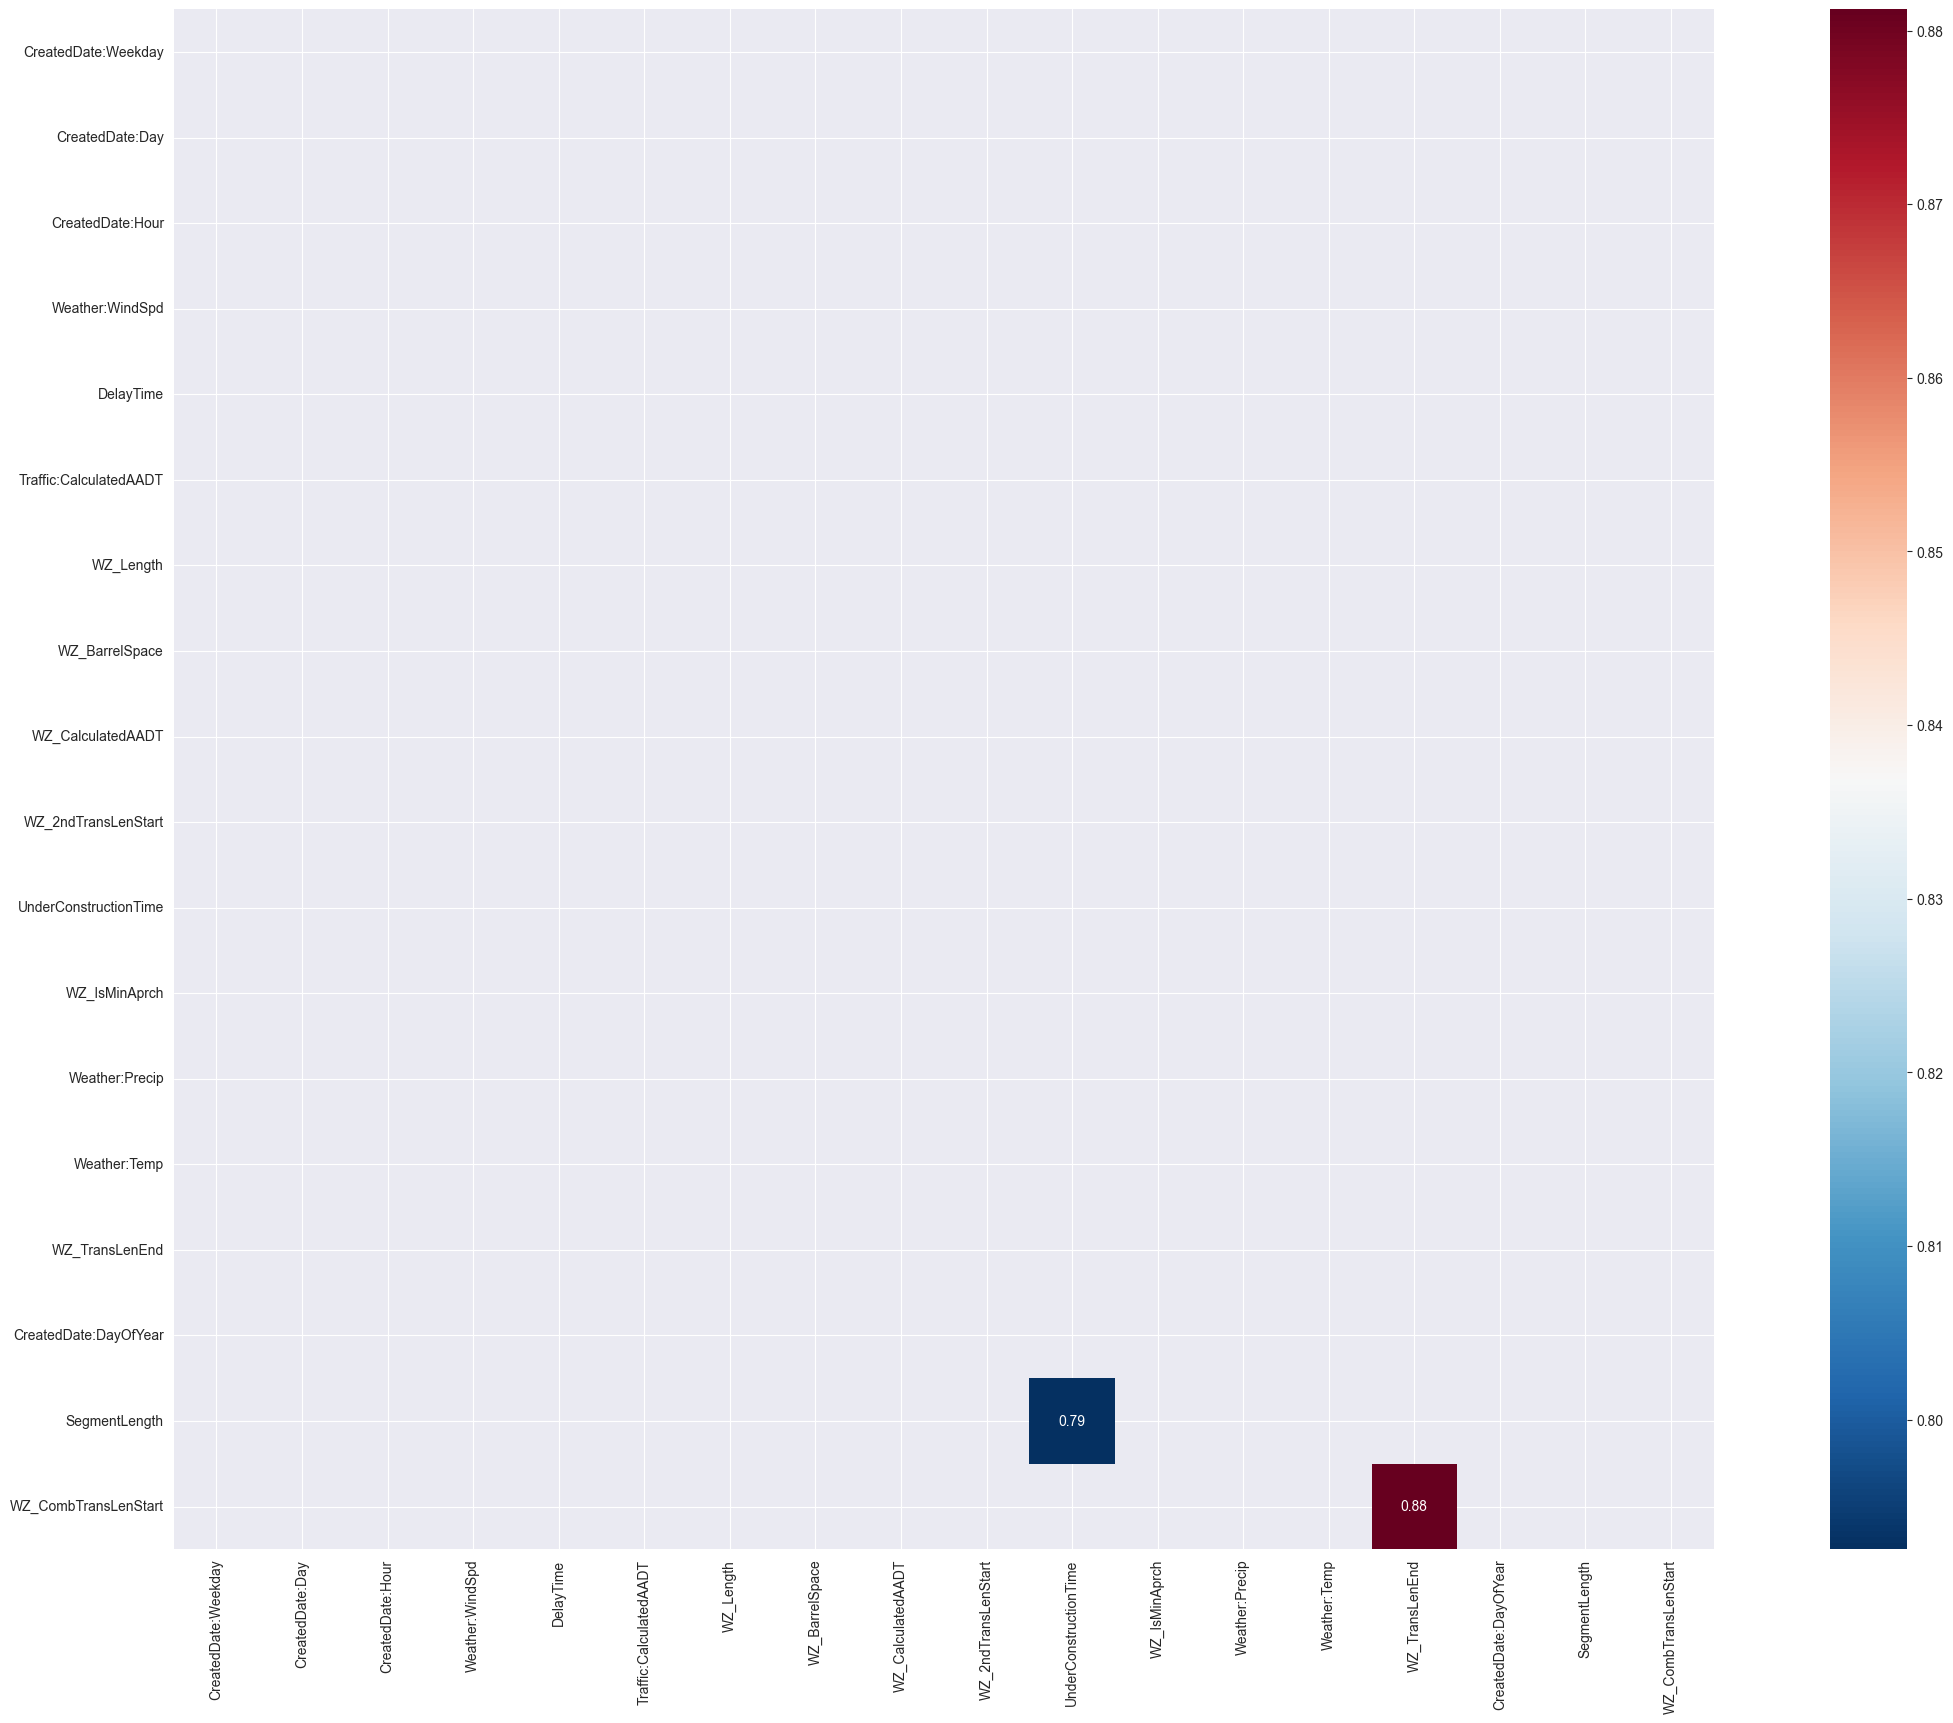

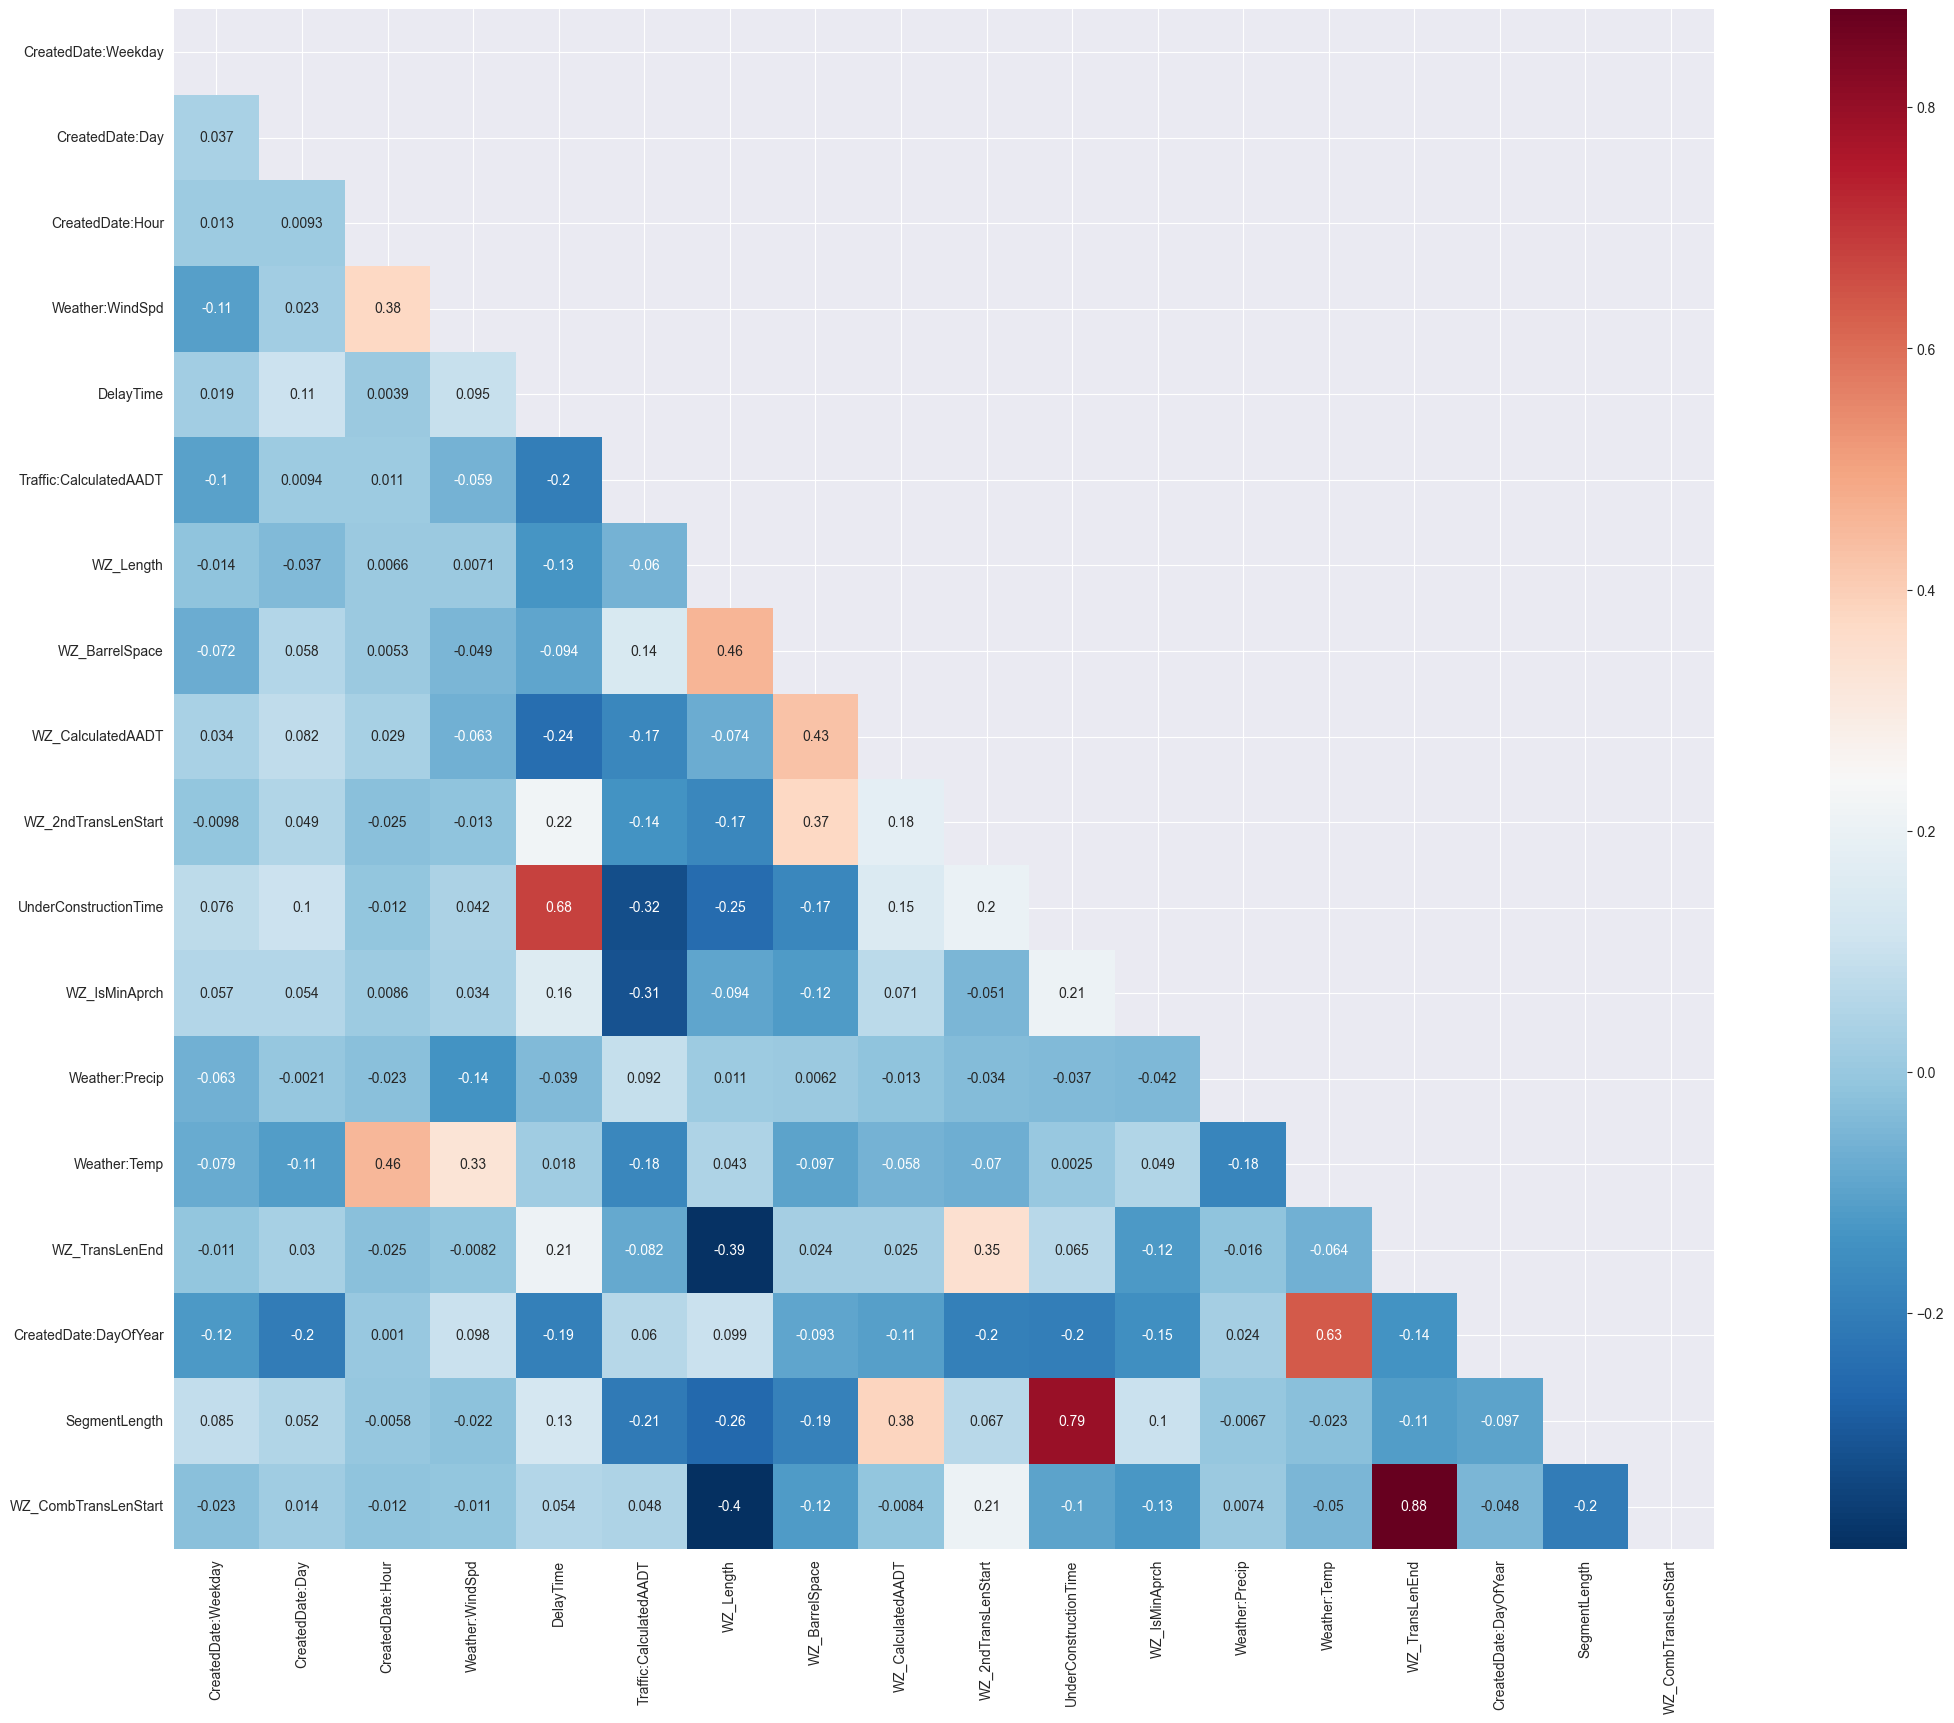

In [21]:
plot_corr_mat(df_selected)

In [22]:
# plot_corr_mat(df)

## Preprocess

### Scale

In [23]:
df_scaled = df_selected.drop(['AssetNumber', 'WZ_IsMinAprch'], axis=1).select_dtypes(include=np.number)
num_cols = df_scaled.columns 

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_scaled)
df_scaled = pd.DataFrame(scaled_data, columns=df_scaled.columns)

df_scaled['WZ_IsMinAprch'] = df_selected['WZ_IsMinAprch']
df_scaled['AssetNumber'] = df_selected['AssetNumber']
# df_scaled['TravelDirect_Code'] = df_selected['TravelDirect_Code']
# df_scaled['WZ_IsMinAprch'] = df_selected['WZ_IsMinAprch']

df_scaled

,CreatedDate:Weekday,CreatedDate:Day,CreatedDate:Hour,Weather:WindSpd,DelayTime,Traffic:CalculatedAADT,WZ_Length,WZ_BarrelSpace,WZ_CalculatedAADT,WZ_2ndTransLenStart,UnderConstructionTime,Weather:Precip,Weather:Temp,WZ_TransLenEnd,CreatedDate:DayOfYear,SegmentLength,WZ_CombTransLenStart,WZ_IsMinAprch,AssetNumber
0,-0.680015,-1.206588,1.580360,-0.655904,-0.482758,0.676635,-0.603191,2.927585,1.962685,-0.320168,-0.314678,-0.301736,0.120286,2.794579,0.091884,-0.083606,1.591092,0,49831911074
1,-0.680015,-1.206588,1.580360,-0.655904,-0.482758,0.676635,-0.603191,2.927585,1.962685,-0.320168,-0.314678,-0.301736,0.120286,1.054723,0.091884,-0.083606,-0.678843,0,49831911074
2,-0.680015,-1.206588,1.580360,-0.655904,-0.482758,0.676635,-0.603191,2.927585,1.962685,-0.320168,-0.314678,-0.301736,0.120286,2.794579,0.091884,-0.083606,1.591092,0,49831911074
3,-0.680015,-1.206588,1.580360,-0.655904,-0.482758,0.676635,-0.603191,2.927585,1.962685,-0.320168,-0.314678,-0.301736,0.120286,1.054723,0.091884,-0.083606,-0.678843,0,49831911074
4,-0.680015,-1.206588,1.580360,-0.655904,-0.482758,0.676635,-0.603191,2.927585,1.962685,-0.320168,-0.314678,-0.301736,0.120286,2.794579,0.091884,-0.083606,1.591092,0,49831911074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251480,1.805360,-1.299435,-0.554795,1.065044,1.822821,-1.859526,-0.504953,-0.581959,-1.199055,1.979215,1.158305,-0.301736,-0.447268,1.924651,-1.318208,-0.468714,0.834447,1,35996382912
251481,1.805360,-1.299435,-0.554795,1.065044,1.822821,-1.859526,-0.504953,-0.581959,-1.027585,-0.320168,1.158305,-0.301736,-0.447268,-0.685132,-1.318208,-0.468714,-0.678843,1,35996382912
251482,1.805360,-1.299435,-0.554795,1.065044,1.961711,-1.859526,-0.504953,-0.581959,-1.199055,-0.320168,1.235830,-0.301736,-0.447268,-0.685132,-1.318208,-0.468714,-0.678843,1,35996382912
251483,1.805360,-1.299435,-0.554795,1.065044,1.961711,-1.859526,-0.504953,-0.581959,-1.199055,1.979215,1.235830,-0.301736,-0.447268,1.924651,-1.318208,-0.468714,0.834447,1,35996382912


### One-hot Encoding

In [24]:
def onehot_encode(df_processed, cols):
    cols = [c for c in cols if (c in df_processed.columns) and (df_processed[c].nunique() >= 1)]
    print(cat_cols)

    for col in cols:
        label_encoder = skl_preprocessing.LabelEncoder()

        integer_encoded = label_encoder.fit_transform(df_processed[col])
        integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

        onehot_encoder = skl_preprocessing.OneHotEncoder(sparse=False)
        onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
        onehot_df = pd.DataFrame(onehot_encoded,
                                 columns=[col + ':' + category.replace(" ", "") + "_onehot" for category in
                                          df_processed[col].unique()])
        onehot_df.columns = [str(c) + '_onehot' for c in onehot_df.columns]
        df_processed = df_processed.join(onehot_df)

    return df_processed

In [25]:
APPLY_ONEHOT = False
cat_cols = {'Spread', 'TrafficImpact', 'RoadType', 'TravelDirect', 'CreatedDate:Season'}

if APPLY_ONEHOT:
    df_selected = onehot_encode(df_selected, cat_cols)
    # df_selected

    df_scaled = onehot_encode(df_scaled, cat_cols)

elif not APPLY_ONEHOT:
    cat_codes = {}
    for col in cat_cols:
        df_selected[col + '_code'], uniq_val = pd.factorize(df_selected[col])
        df_scaled[col + '_code'] = df_selected[col + '_code']
        cat_codes[col] = uniq_val

cat_codes

{'RoadType': Index(['Two-Lane, Two-Way Roadways (>70 km/h)', 'Multi-Lane Undivided Roadways'], dtype='object'),
 'Spread': Index(['Spread 3B', 'Spread 3C', 'Spread 4A', 'Spread 4B'], dtype='object'),
 'CreatedDate:Season': Index(['Spring', 'Summer'], dtype='object'),
 'TrafficImpact': Index(['High', 'Low'], dtype='object'),
 'TravelDirect': Index(['SB', 'NB'], dtype='object')}

# Regression

In [ ]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from lazypredict import Supervised

REMOVE_REGRESSORS = ["GammaRegressor", "GaussianProcessRegressor", "KernelRidge", "QuantileRegressor", "NuSVR", "SVR"]
REGRESSORS = [reg for reg in Supervised.REGRESSORS if reg[0] not in REMOVE_REGRESSORS]
# REGRESSORS

# Supervised.removed_regressors.append("QuantileRegressor")
# Supervised.REGRESSORS.remove(('NuSVR', sklearn.svm._classes.NuSVR))
# Supervised.REGRESSORS.remove(('QuantileRegressor', sklearn.linear_model._quantile.QuantileRegressor))
# all_estimators()

In [ ]:
X, y = df.drop(['AssetNumber', 'DelayTime'], axis=1), df['DelayTime']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
reg = LazyRegressor(predictions=True, regressors=REGRESSORS, verbose=1, ignore_warnings=False, custom_metric=None)

models, predictions = reg.fit(X_train, X_test, y_train, y_test)

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


  3%|▎         | 1/36 [00:38<22:11, 38.05s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.6209967431719361, 'Adjusted R-Squared': 0.6208406398493824, 'RMSE': 0.1843465740086376, 'Time taken': 38.051820516586304}


  6%|▌         | 2/36 [00:51<13:31, 23.86s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9999373653787891, 'Adjusted R-Squared': 0.9999373395809303, 'RMSE': 0.0023698498330947597, 'Time taken': 13.922283411026001}


  8%|▊         | 3/36 [00:53<07:28, 13.58s/it]

{'Model': 'BayesianRidge', 'R-Squared': 0.9729619833539861, 'Adjusted R-Squared': 0.9729508469741327, 'RMSE': 0.04923806932222907, 'Time taken': 1.3416130542755127}


 11%|█         | 4/36 [00:56<04:57,  9.30s/it]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9998417524561417, 'Adjusted R-Squared': 0.9998416872773683, 'RMSE': 0.003766882633934035, 'Time taken': 2.74402117729187}


 14%|█▍        | 5/36 [00:56<03:12,  6.20s/it]

{'Model': 'DummyRegressor', 'R-Squared': -0.00011604930756603515, 'Adjusted R-Squared': -0.0005279756839851046, 'RMSE': 0.2994599848109379, 'Time taken': 0.6925399303436279}


 17%|█▋        | 6/36 [00:57<02:11,  4.39s/it]

{'Model': 'ElasticNet', 'R-Squared': -0.00011604930756603515, 'Adjusted R-Squared': -0.0005279756839851046, 'RMSE': 0.2994599848109379, 'Time taken': 0.8711256980895996}


 19%|█▉        | 7/36 [01:02<02:08,  4.44s/it]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9727056927951088, 'Adjusted R-Squared': 0.9726944508546644, 'RMSE': 0.04947088020510851, 'Time taken': 4.54990291595459}


 22%|██▏       | 8/36 [01:03<01:40,  3.59s/it]

{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9998859575403864, 'Adjusted R-Squared': 0.9998859105687403, 'RMSE': 0.003197767524108056, 'Time taken': 1.7694194316864014}


 25%|██▌       | 9/36 [03:00<17:29, 38.88s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9999842330301881, 'Adjusted R-Squared': 0.9999842265361111, 'RMSE': 0.0011890160525816291, 'Time taken': 116.48111510276794}


 28%|██▊       | 10/36 [04:11<21:07, 48.75s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9901856041280007, 'Adjusted R-Squared': 0.9901815617885831, 'RMSE': 0.029665070563175112, 'Time taken': 70.85969948768616}


 31%|███       | 11/36 [04:14<14:29, 34.76s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9920933541907341, 'Adjusted R-Squared': 0.9920900976126998, 'RMSE': 0.026626233855945754, 'Time taken': 3.0457730293273926}


 33%|███▎      | 12/36 [04:23<10:46, 26.93s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.9601225796261377, 'Adjusted R-Squared': 0.960106154970932, 'RMSE': 0.059796687733866545, 'Time taken': 9.011366367340088}


 36%|███▌      | 13/36 [04:38<09:00, 23.49s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.992230763254796, 'Adjusted R-Squared': 0.9922275632726117, 'RMSE': 0.026393852032938175, 'Time taken': 15.567324161529541}


 39%|███▉      | 14/36 [04:39<06:06, 16.64s/it]

{'Model': 'Lars', 'R-Squared': -924.8089413174754, 'Adjusted R-Squared': -925.1902621879057, 'RMSE': 9.111172839409182, 'Time taken': 0.8061385154724121}


 42%|████▏     | 15/36 [04:42<04:20, 12.39s/it]

{'Model': 'LarsCV', 'R-Squared': 0.9704722493321062, 'Adjusted R-Squared': 0.9704600874841438, 'RMSE': 0.051455142160439164, 'Time taken': 2.536895275115967}


 44%|████▍     | 16/36 [04:43<02:58,  8.93s/it]

{'Model': 'Lasso', 'R-Squared': -0.00011604930756603515, 'Adjusted R-Squared': -0.0005279756839851046, 'RMSE': 0.2994599848109379, 'Time taken': 0.8750057220458984}


 47%|████▋     | 17/36 [04:47<02:23,  7.57s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9727112801008414, 'Adjusted R-Squared': 0.9727000404616886, 'RMSE': 0.04946581645541201, 'Time taken': 4.413602828979492}


 50%|█████     | 18/36 [04:48<01:39,  5.54s/it]

{'Model': 'LassoLars', 'R-Squared': -0.00011604930756603515, 'Adjusted R-Squared': -0.0005279756839851046, 'RMSE': 0.2994599848109379, 'Time taken': 0.8192868232727051}


 53%|█████▎    | 19/36 [04:50<01:18,  4.61s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9729614959646553, 'Adjusted R-Squared': 0.9729503593840567, 'RMSE': 0.049238513104807986, 'Time taken': 2.4266936779022217}


 56%|█████▌    | 20/36 [04:52<00:58,  3.64s/it]

{'Model': 'LassoLarsIC', 'R-Squared': 0.9729618961032932, 'Adjusted R-Squared': 0.9729507596875031, 'RMSE': 0.0492381487668913, 'Time taken': 1.396272897720337}


 58%|█████▊    | 21/36 [04:53<00:43,  2.87s/it]

{'Model': 'LinearRegression', 'R-Squared': 0.9729607869545663, 'Adjusted R-Squared': 0.9729496500819417, 'RMSE': 0.04923915867258156, 'Time taken': 1.0721960067749023}


 61%|██████    | 22/36 [06:13<06:03, 26.00s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.9546470582835069, 'Adjusted R-Squared': 0.9546283783783558, 'RMSE': 0.06376998734737938, 'Time taken': 79.92250347137451}


 64%|██████▍   | 23/36 [06:42<05:50, 27.00s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9998547345710275, 'Adjusted R-Squared': 0.9998546747393091, 'RMSE': 0.00360906526172164, 'Time taken': 29.33364510536194}


 67%|██████▋   | 24/36 [06:43<03:49, 19.14s/it]

{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9667625925941988, 'Adjusted R-Squared': 0.9667489028180937, 'RMSE': 0.054591769333215884, 'Time taken': 0.794386625289917}


 69%|██████▉   | 25/36 [06:44<02:32, 13.89s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9672244892346181, 'Adjusted R-Squared': 0.9672109897038444, 'RMSE': 0.05421111428165247, 'Time taken': 1.6381065845489502}


 72%|███████▏  | 26/36 [06:46<01:40, 10.03s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9511869690972914, 'Adjusted R-Squared': 0.9511668640555258, 'RMSE': 0.0661578658748278, 'Time taken': 1.0512700080871582}


 75%|███████▌  | 27/36 [06:46<01:05,  7.29s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.21563101138031182, 'Adjusted R-Squared': 0.21530794659649866, 'RMSE': 0.2652001755857745, 'Time taken': 0.8857588768005371}


 78%|███████▊  | 28/36 [06:49<00:47,  5.95s/it]

{'Model': 'RANSACRegressor', 'R-Squared': 0.9359514509768844, 'Adjusted R-Squared': 0.9359250707515773, 'RMSE': 0.0757823812537613, 'Time taken': 2.8357696533203125}


 81%|████████  | 29/36 [08:58<04:58, 42.67s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9999442125156136, 'Adjusted R-Squared': 0.9999441895379438, 'RMSE': 0.002236567393174346, 'Time taken': 128.34120273590088}


 83%|████████▎ | 30/36 [08:58<03:00, 30.11s/it]

{'Model': 'Ridge', 'R-Squared': 0.9729624223057516, 'Adjusted R-Squared': 0.972951286106693, 'RMSE': 0.04923766964008042, 'Time taken': 0.7991445064544678}


 86%|████████▌ | 31/36 [09:00<01:47, 21.57s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.9729619577539843, 'Adjusted R-Squared': 0.9729508213635868, 'RMSE': 0.04923809263189678, 'Time taken': 1.6250300407409668}


 89%|████████▉ | 32/36 [09:01<01:01, 15.44s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.9727240201699952, 'Adjusted R-Squared': 0.9727127857782039, 'RMSE': 0.049454268249857214, 'Time taken': 1.156219244003296}


 92%|█████████▏| 33/36 [09:02<00:33, 11.13s/it]

{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9729607869545663, 'Adjusted R-Squared': 0.9729496500819417, 'RMSE': 0.04923915867258156, 'Time taken': 1.062436580657959}


 94%|█████████▍| 34/36 [09:03<00:16,  8.07s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.4225326453569783, 'Adjusted R-Squared': 0.4222947989239938, 'RMSE': 0.22755025093497314, 'Time taken': 0.9211714267730713}


 97%|█████████▋| 35/36 [09:05<00:06,  6.05s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9957007162323435, 'Adjusted R-Squared': 0.995698945449458, 'RMSE': 0.019634129693243546, 'Time taken': 1.3439202308654785}
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1134
[LightGBM] [Info] Number of data points in the train set: 388626, number of used features: 40
[LightGBM] [Info] Start training from score 0.164405


100%|██████████| 36/36 [09:06<00:00, 15.18s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9990442950939052, 'Adjusted R-Squared': 0.9990439014595274, 'RMSE': 0.009257111774485679, 'Time taken': 1.4119012355804443}


In [11]:
models


,AdaBoostRegressor,BaggingRegressor,BayesianRidge,DecisionTreeRegressor,DummyRegressor,ElasticNet,ElasticNetCV,ExtraTreeRegressor,ExtraTreesRegressor,GradientBoostingRegressor,...,PoissonRegressor,RANSACRegressor,RandomForestRegressor,Ridge,RidgeCV,SGDRegressor,TransformedTargetRegressor,TweedieRegressor,XGBRegressor,LGBMRegressor
0,0.20,0.00,0.07,0.00,0.16,0.16,0.07,0.00,0.00,0.02,...,0.19,0.01,0.00,0.07,0.07,0.07,0.07,0.21,0.00,0.01
1,0.28,0.39,0.38,0.39,0.16,0.16,0.38,0.39,0.39,0.36,...,0.14,0.39,0.39,0.38,0.38,0.39,0.38,0.13,0.39,0.39
2,0.19,0.00,-0.01,0.00,0.16,0.16,-0.01,0.00,0.00,0.00,...,0.10,-0.03,0.00,-0.01,-0.01,-0.01,-0.01,-0.01,0.00,-0.00
3,0.19,0.07,0.08,0.07,0.16,0.16,0.08,0.07,0.07,0.05,...,0.12,0.09,0.07,0.08,0.08,0.08,0.08,0.05,0.07,0.07
4,0.20,0.09,0.15,0.09,0.16,0.16,0.14,0.09,0.09,0.08,...,0.16,0.09,0.09,0.15,0.15,0.15,0.15,0.17,0.09,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97152,0.83,0.76,0.78,0.76,0.16,0.16,0.77,0.76,0.76,0.75,...,0.22,0.76,0.76,0.78,0.78,0.78,0.78,0.36,0.76,0.75
97153,0.20,0.18,0.17,0.18,0.16,0.16,0.17,0.18,0.18,0.14,...,0.17,0.18,0.18,0.17,0.17,0.18,0.17,0.15,0.18,0.17
97154,0.21,0.12,0.19,0.12,0.16,0.16,0.19,0.12,0.12,0.10,...,0.19,0.12,0.12,0.19,0.19,0.19,0.19,0.24,0.12,0.11
97155,0.20,0.00,-0.02,0.00,0.16,0.16,-0.02,0.00,0.00,-0.00,...,0.14,-0.03,0.00,-0.02,-0.02,-0.01,-0.02,0.12,-0.00,0.00


# Plot

                                             |          | [  0%]   00:00 -> (? left)


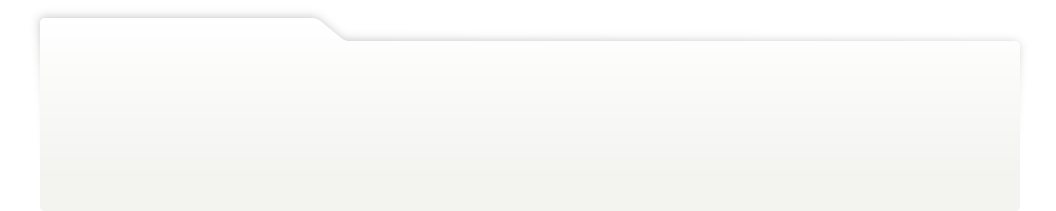
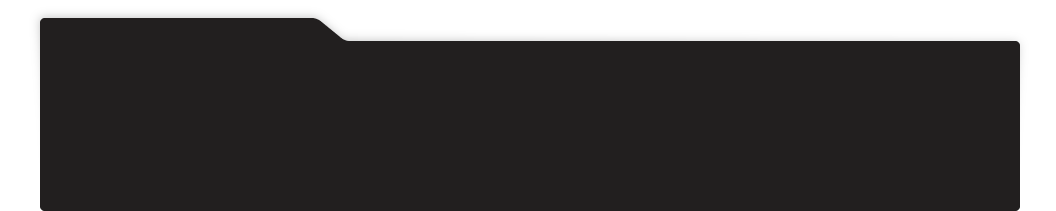
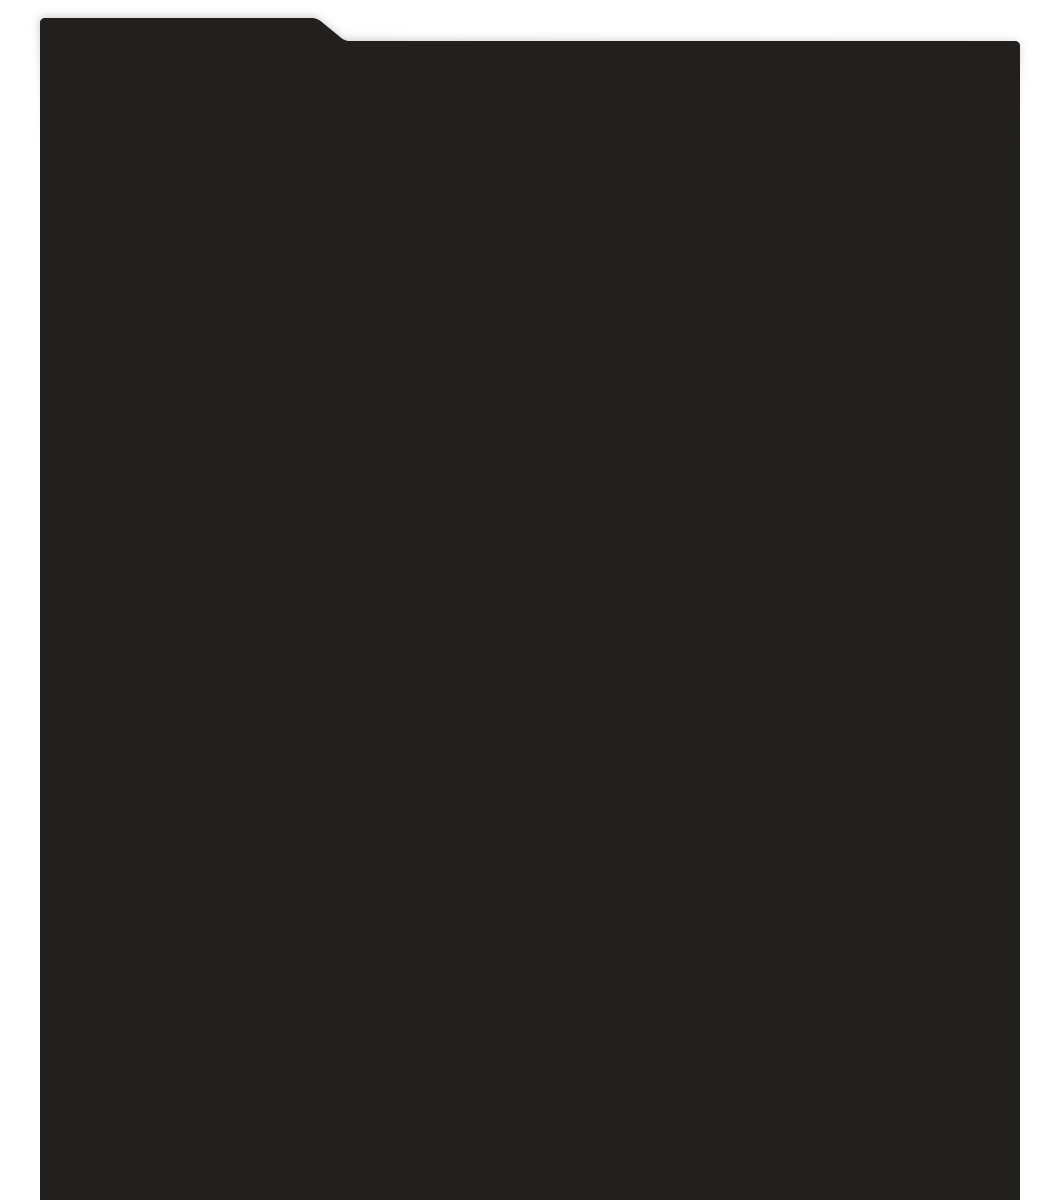
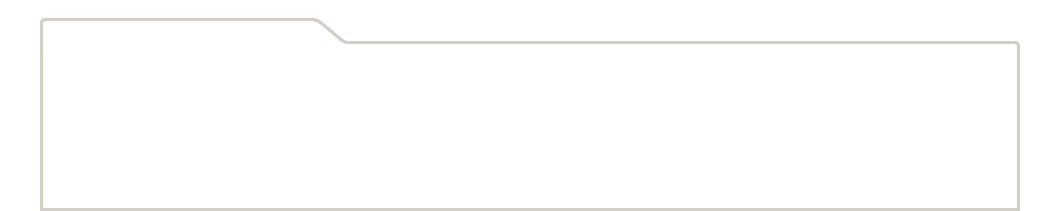
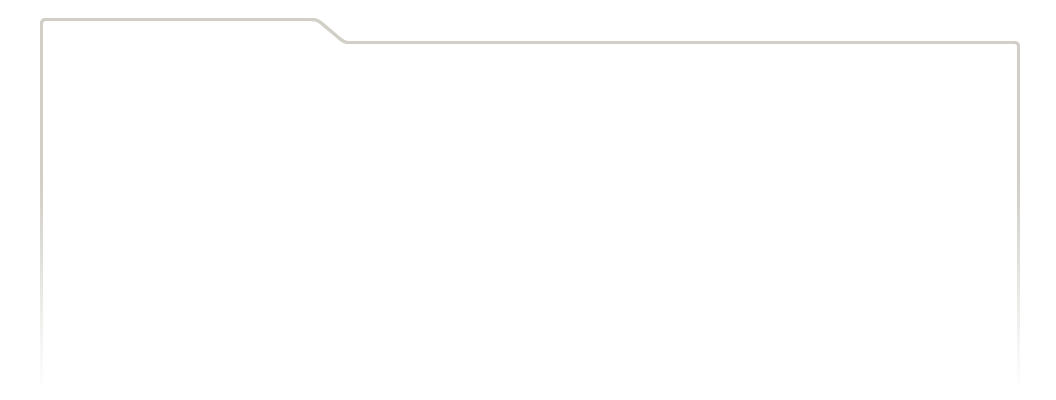
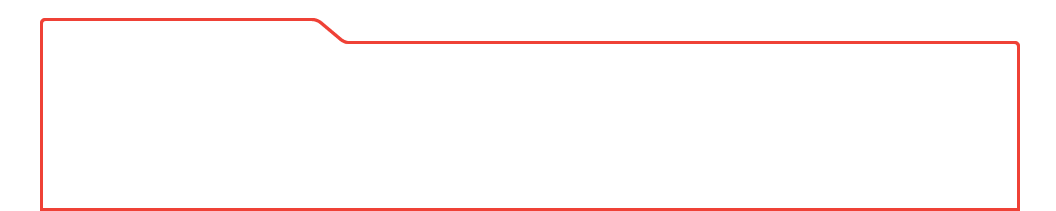
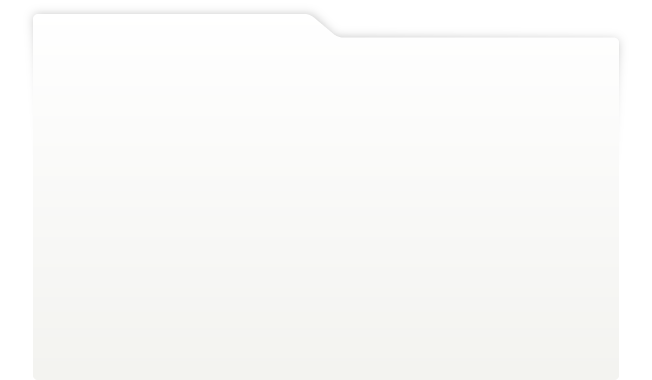
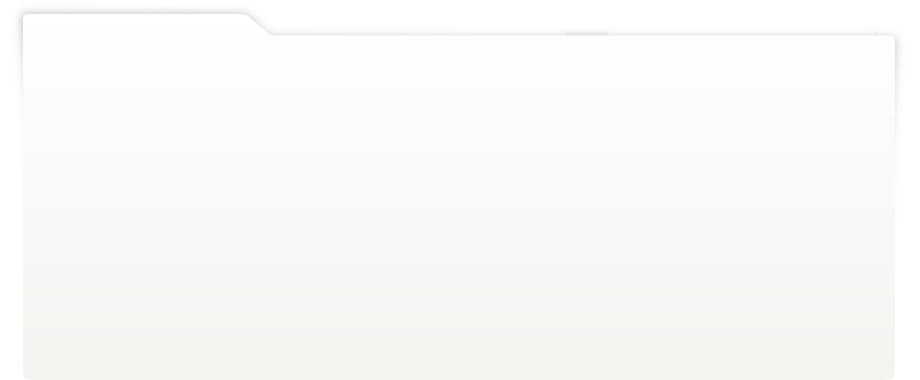
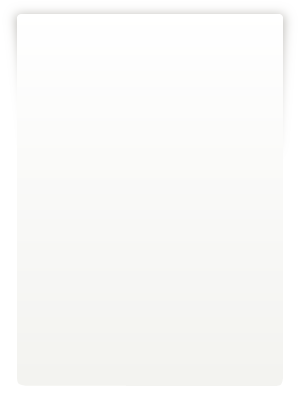
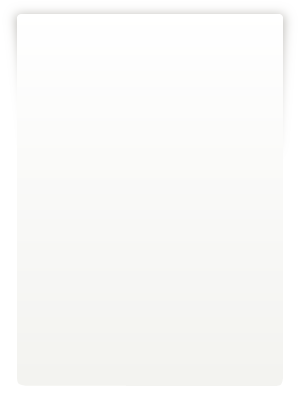
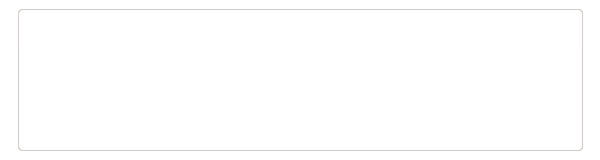
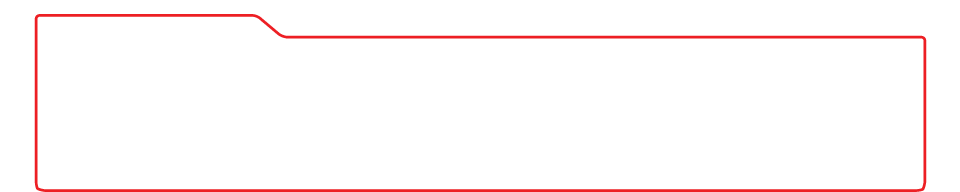
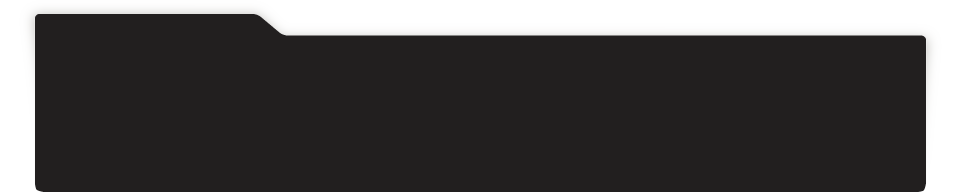
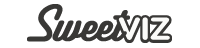
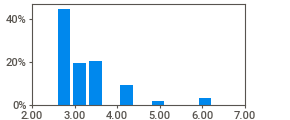
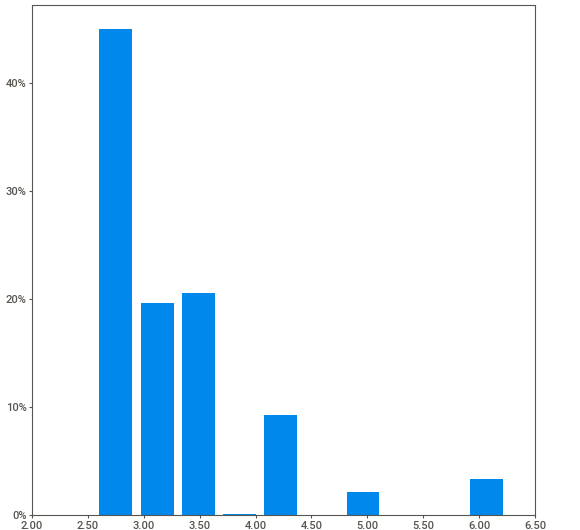
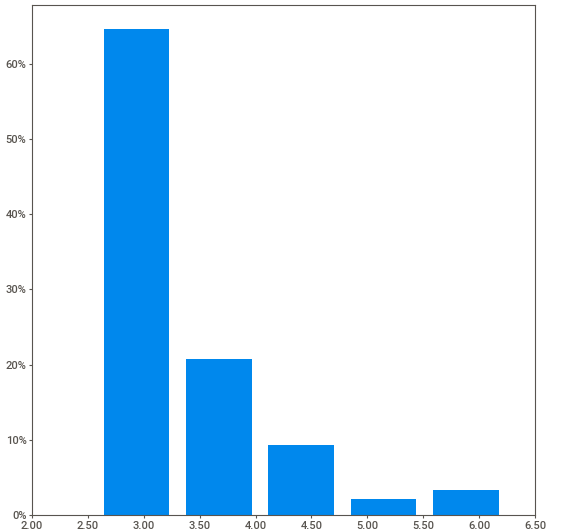
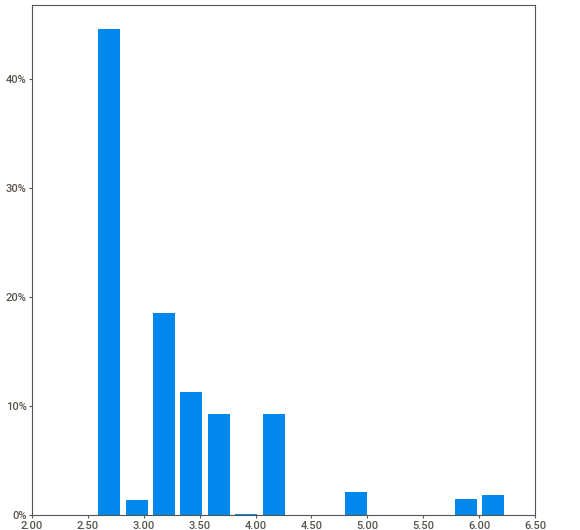
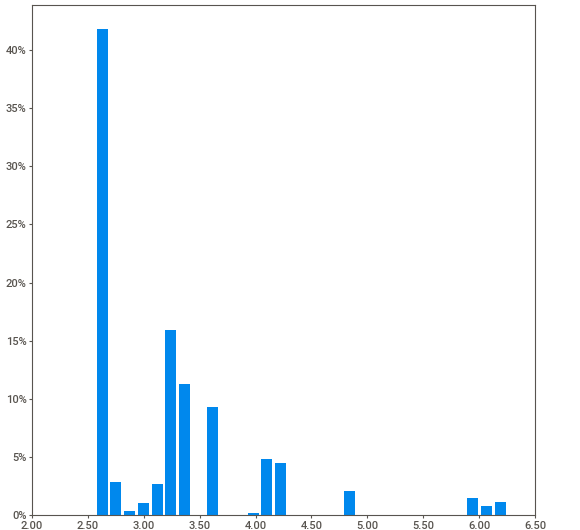
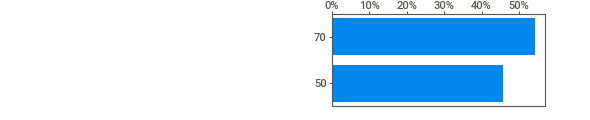
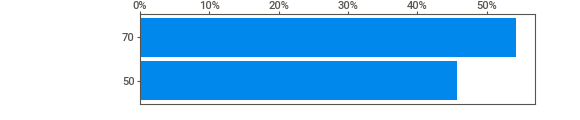
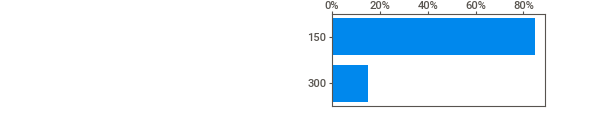
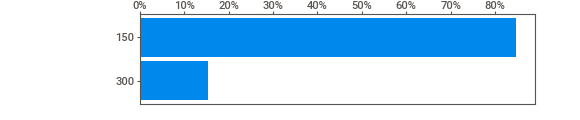
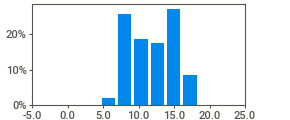
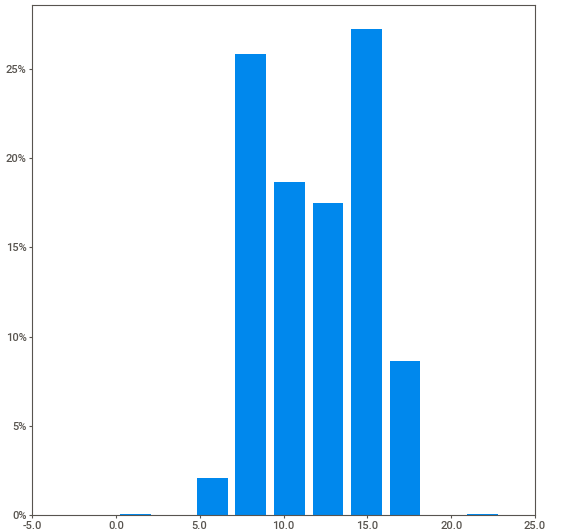
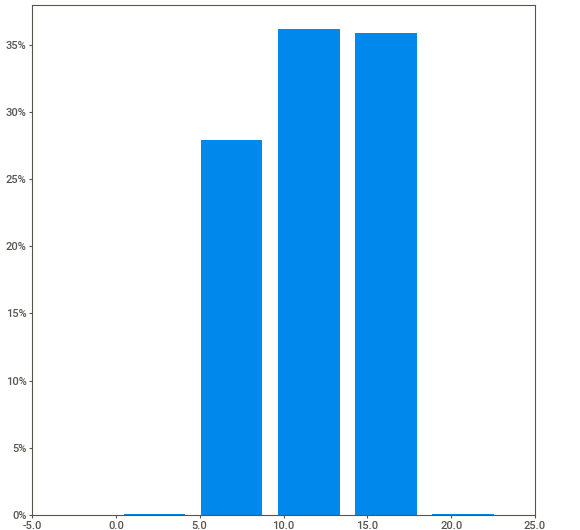
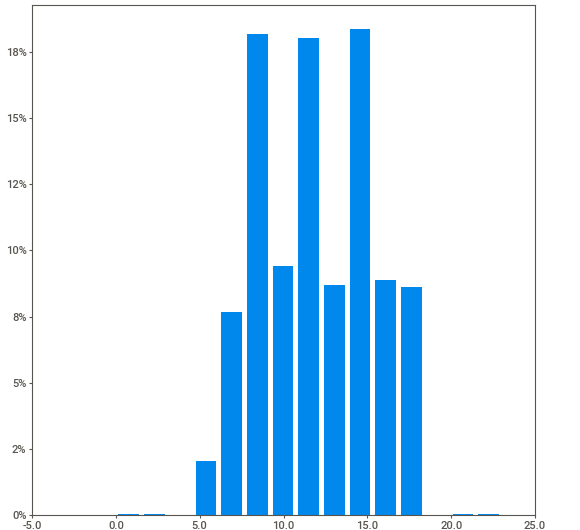
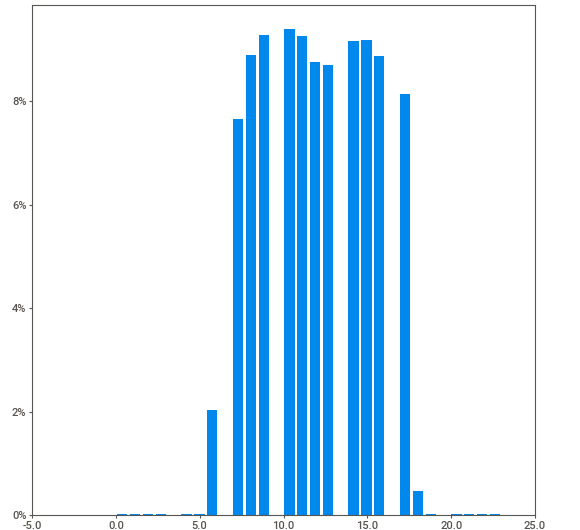
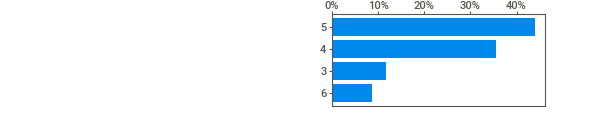
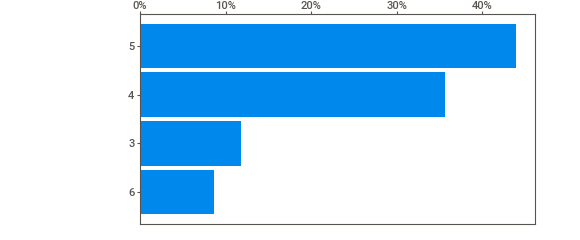
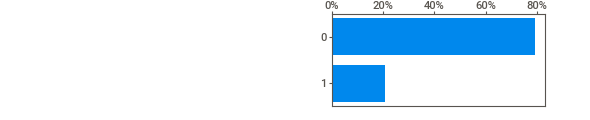
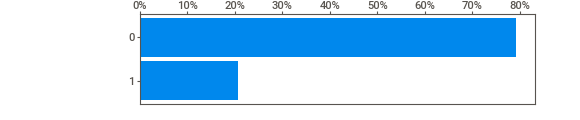
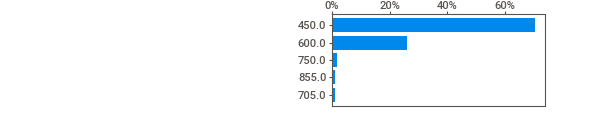
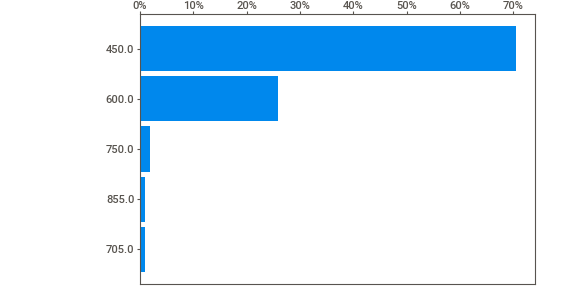
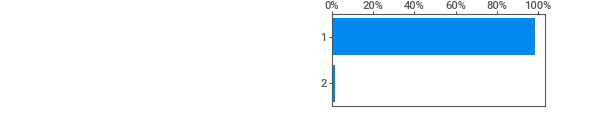
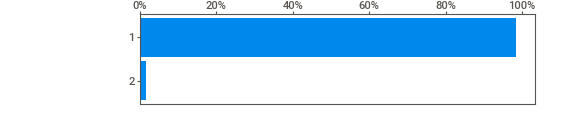
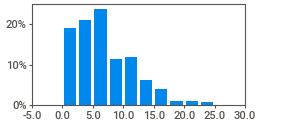
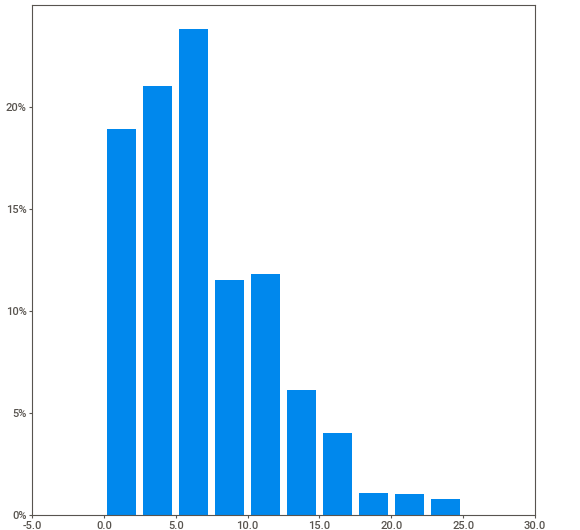
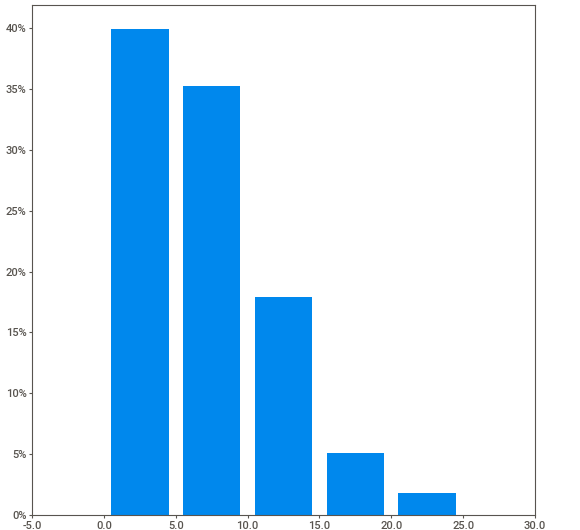
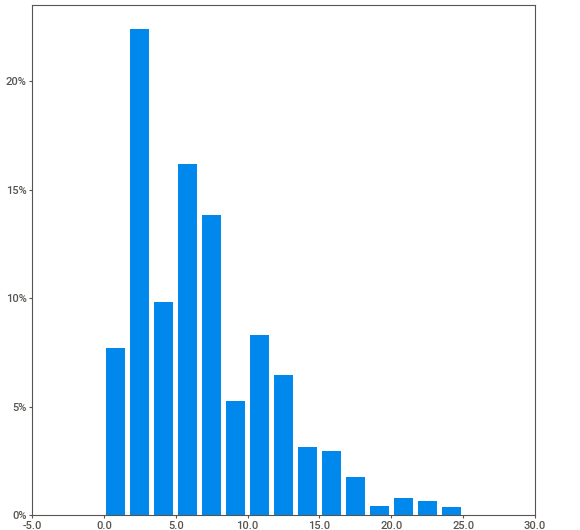
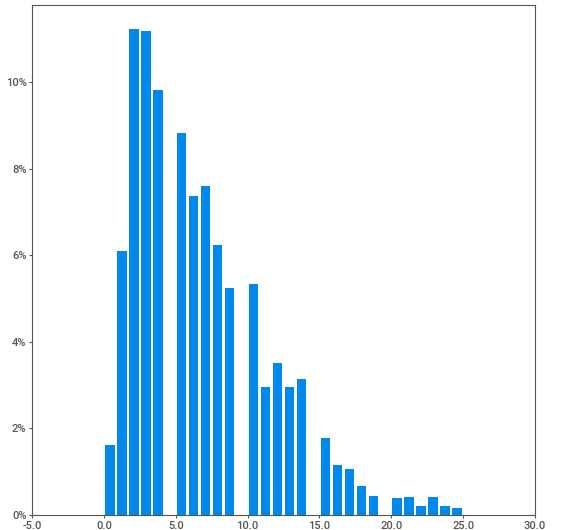
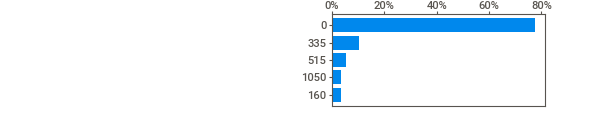
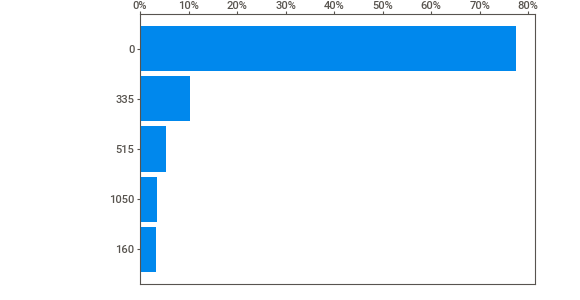
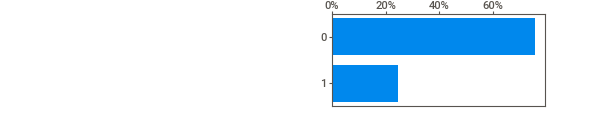
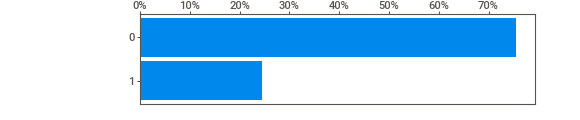
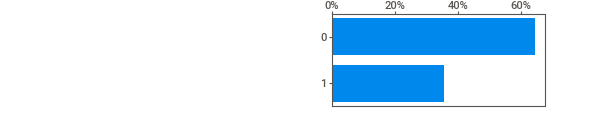
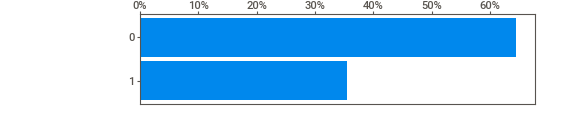
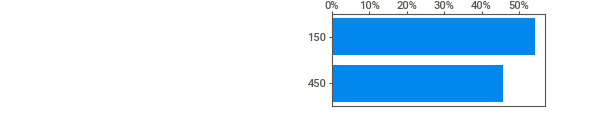
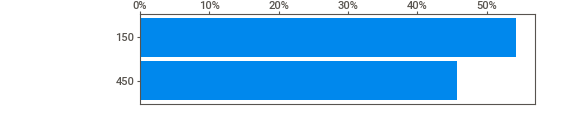
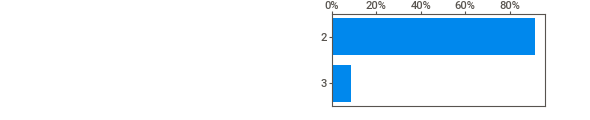
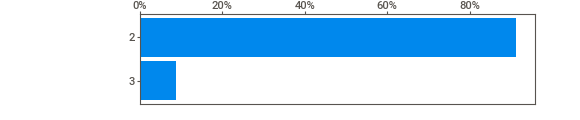
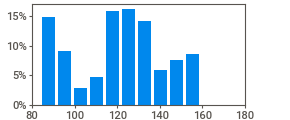
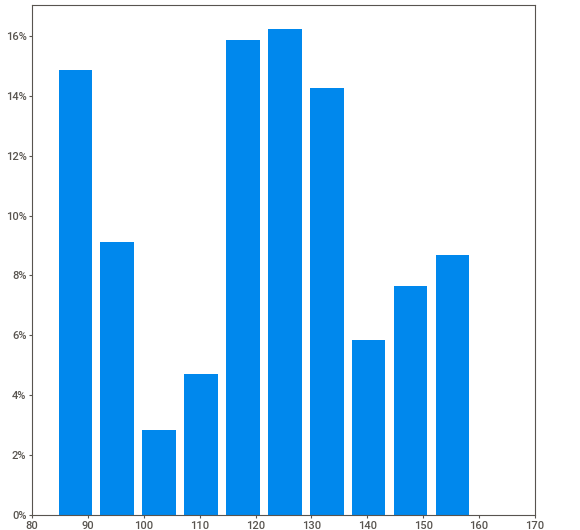
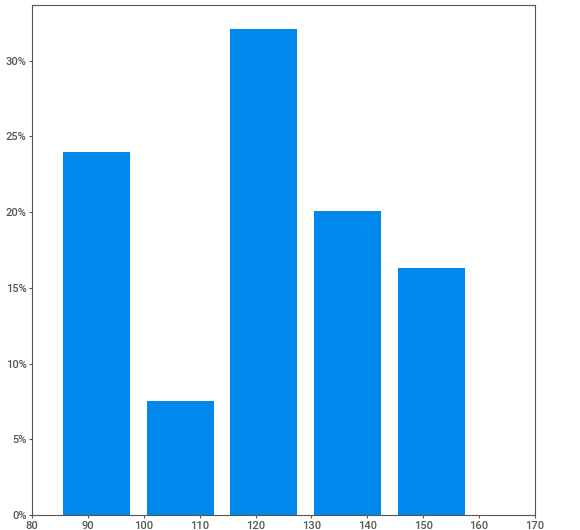
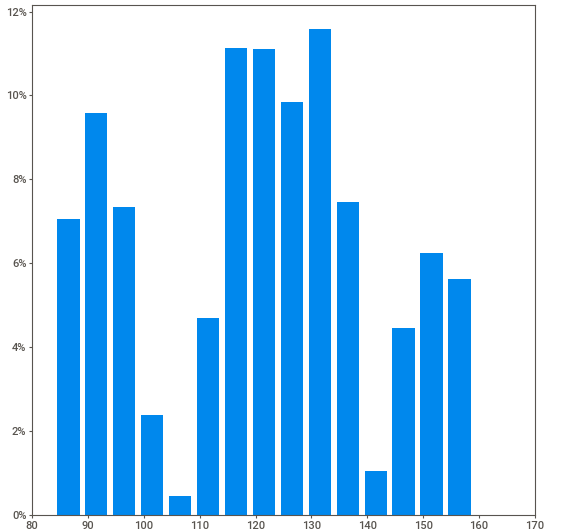
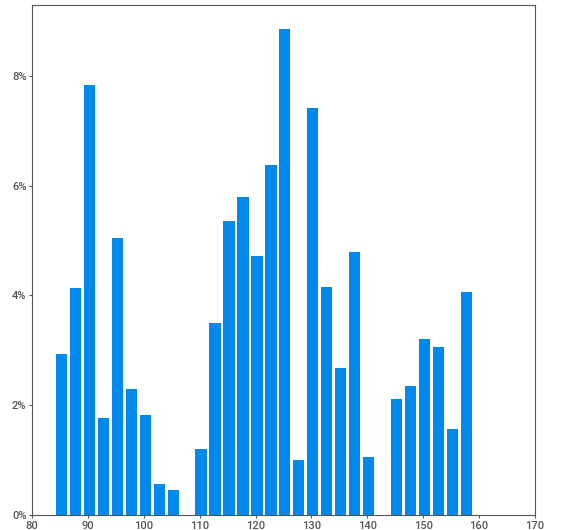
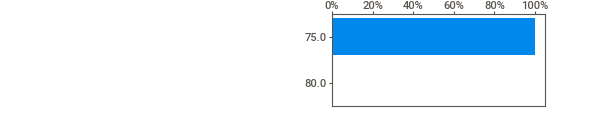
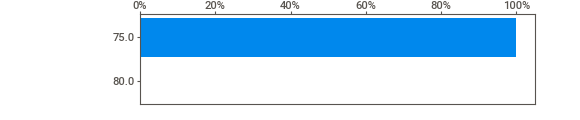
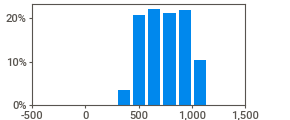
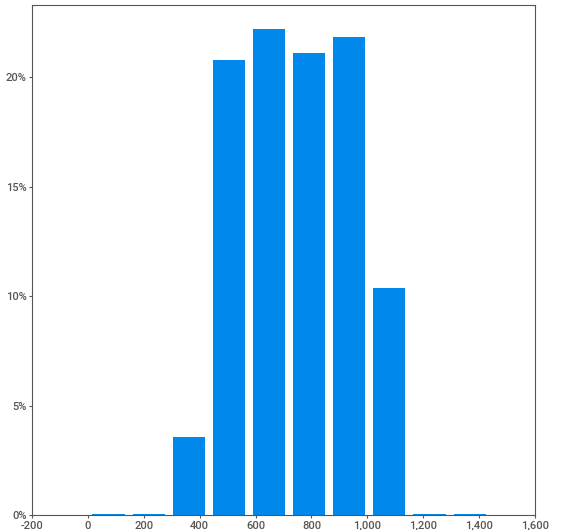
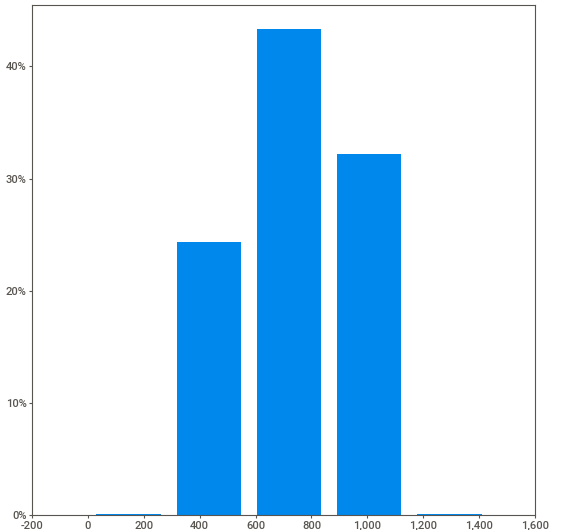
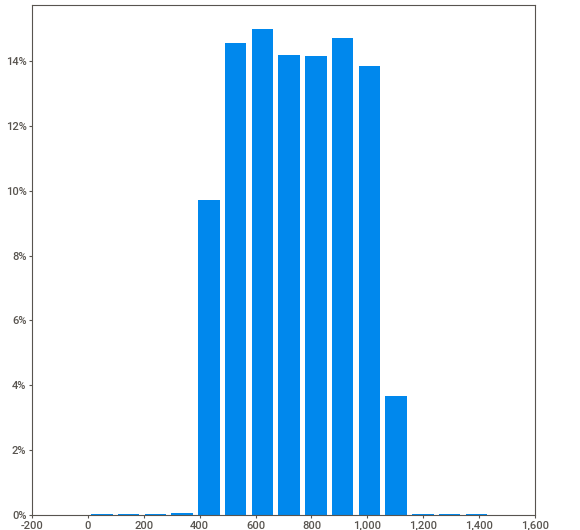
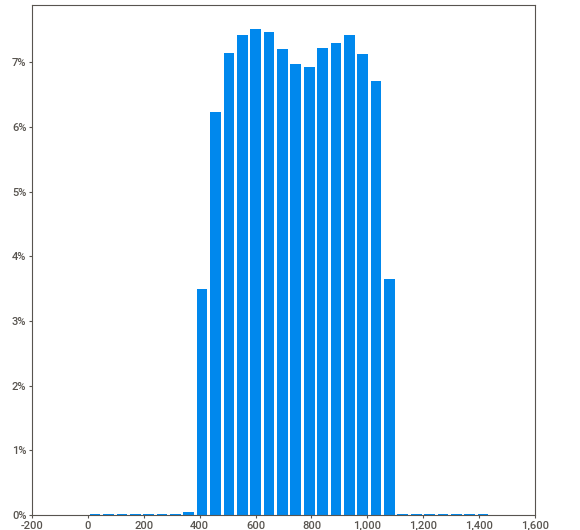
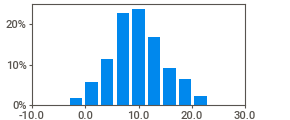
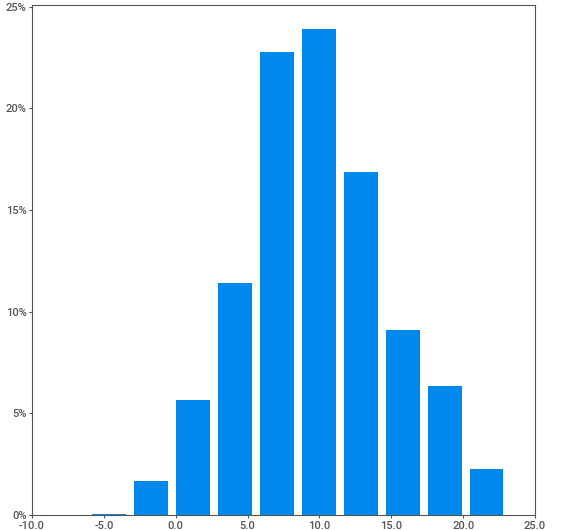
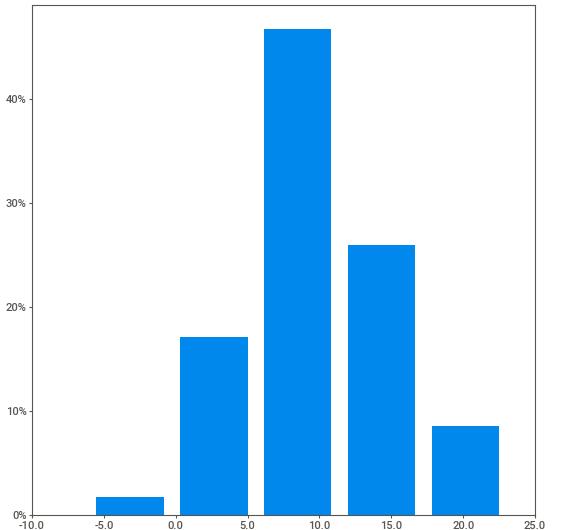
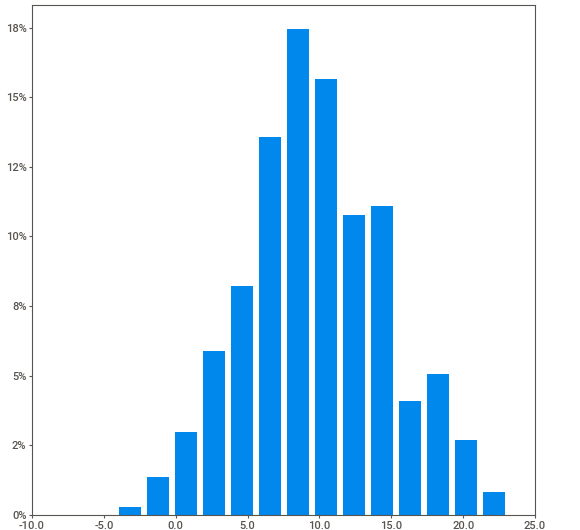
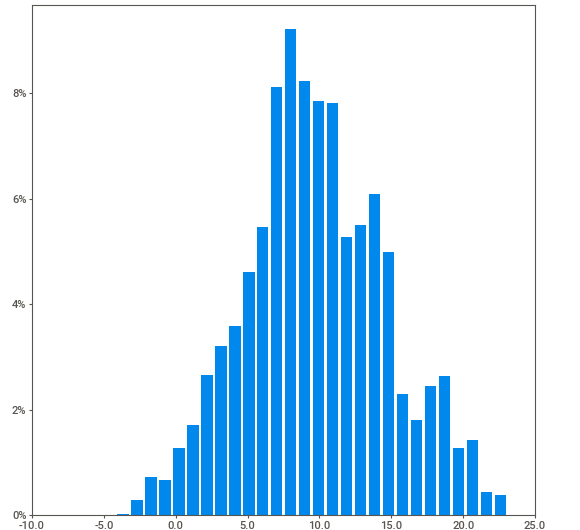
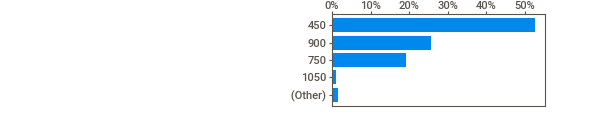
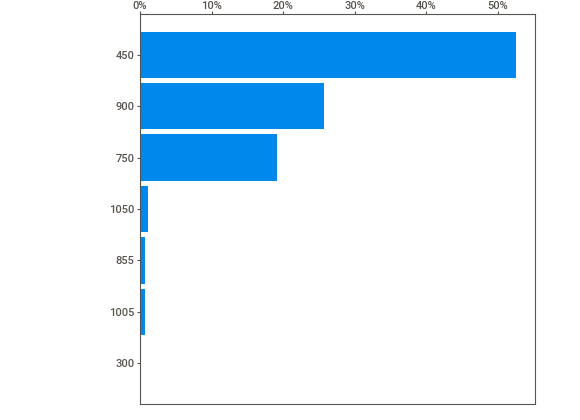
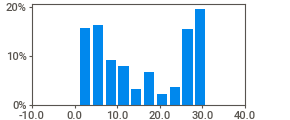
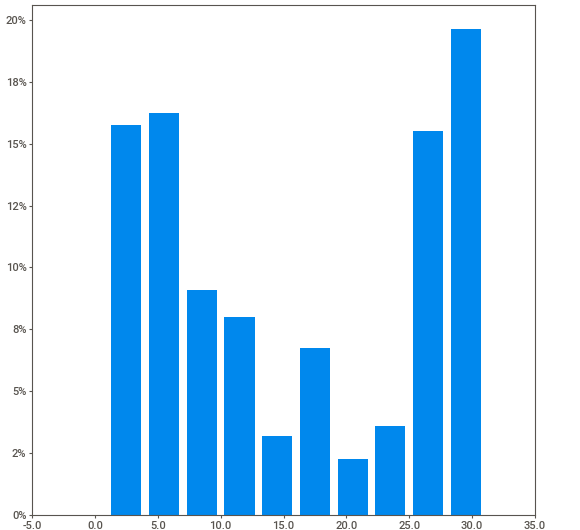
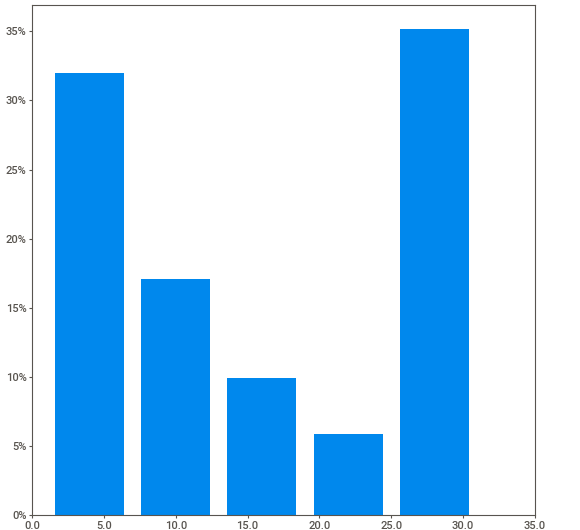
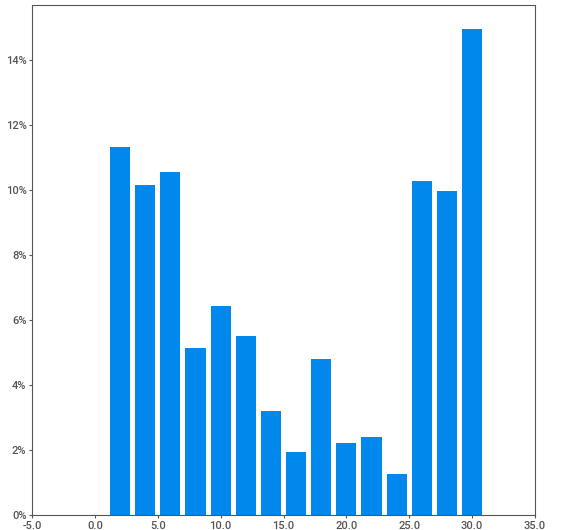
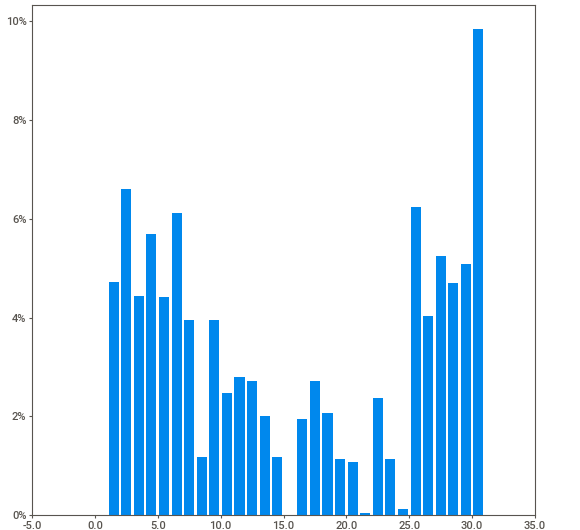
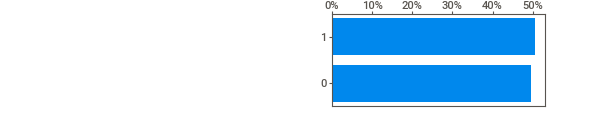
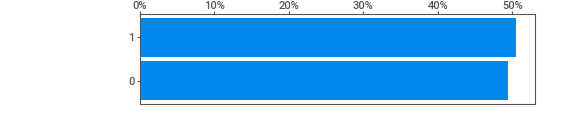
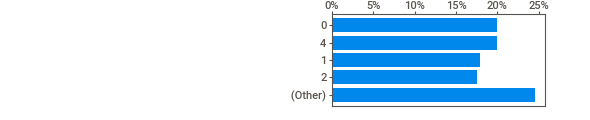
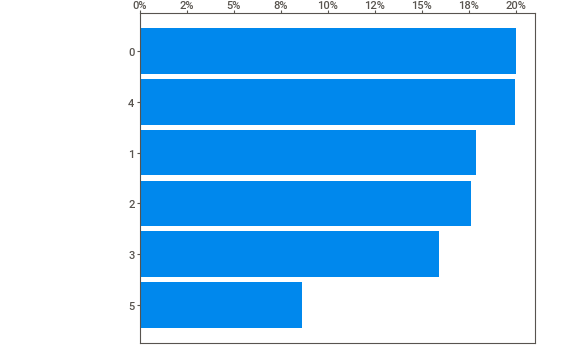
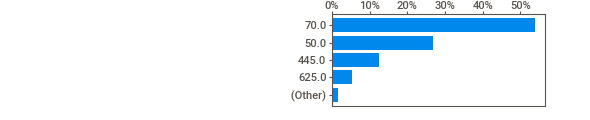
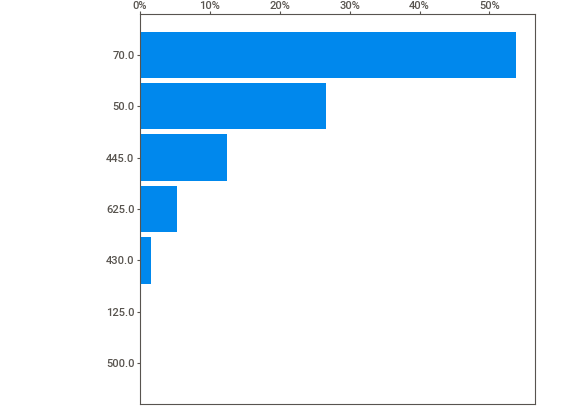
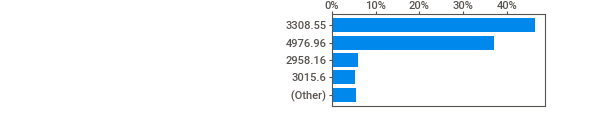
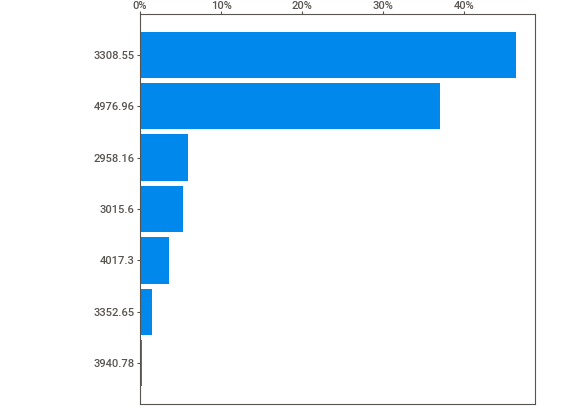
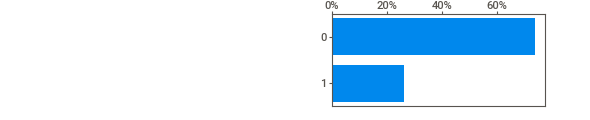
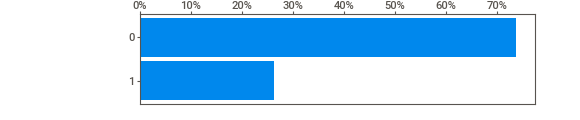
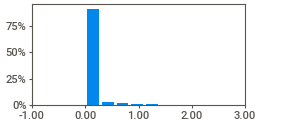
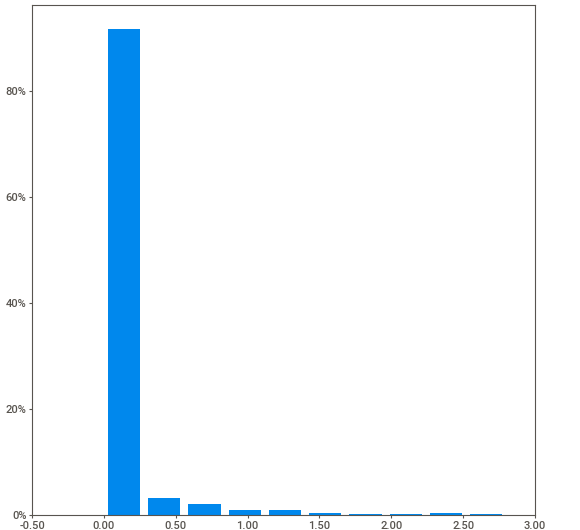
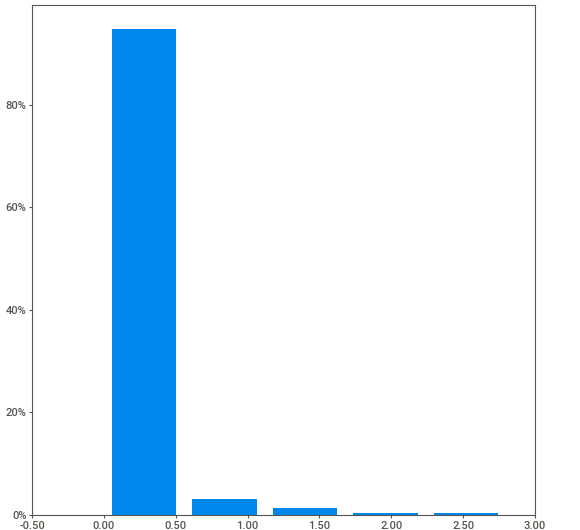
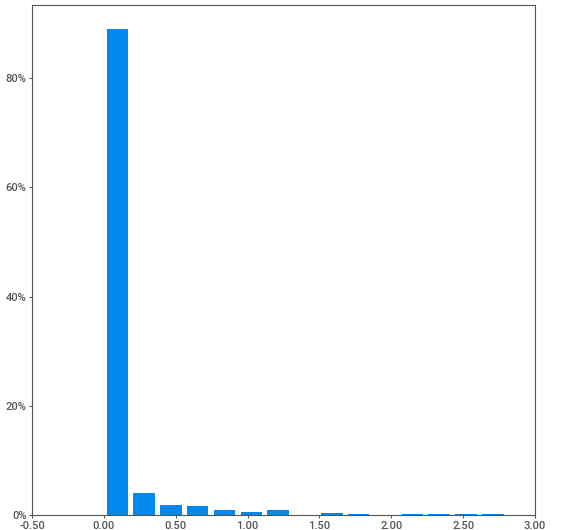
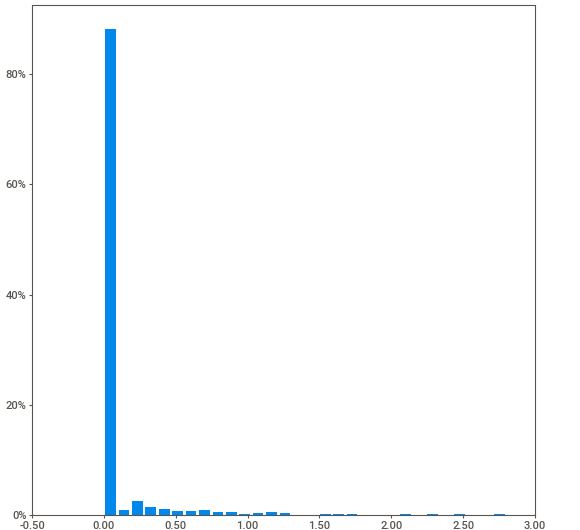
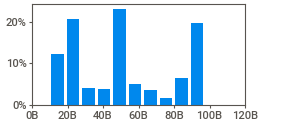
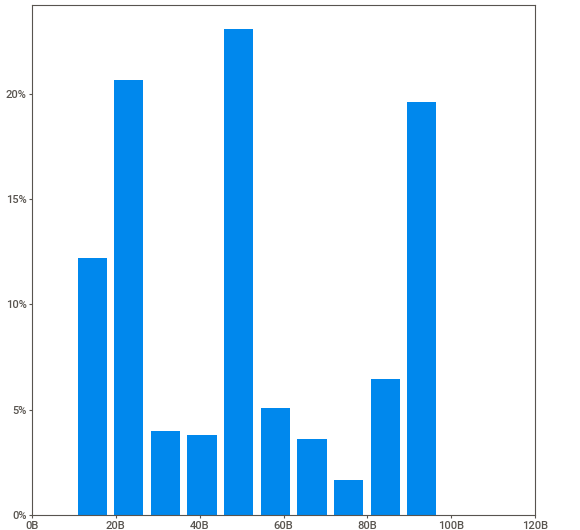
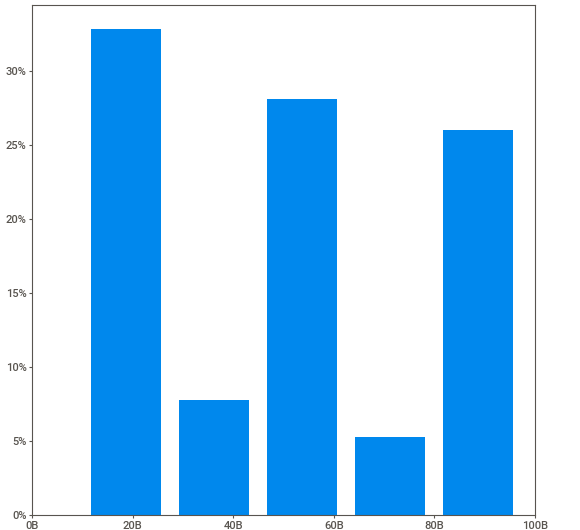
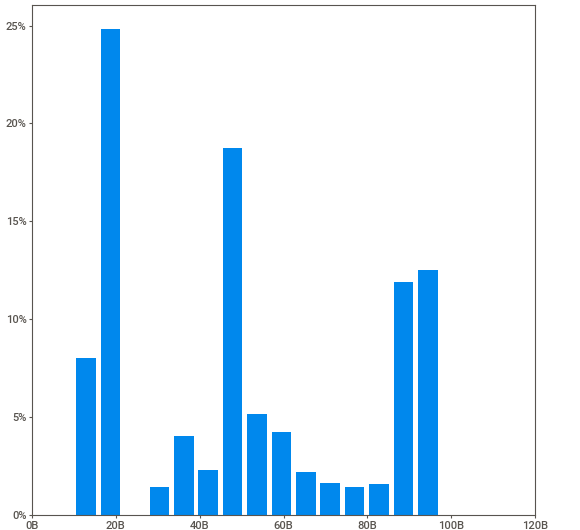
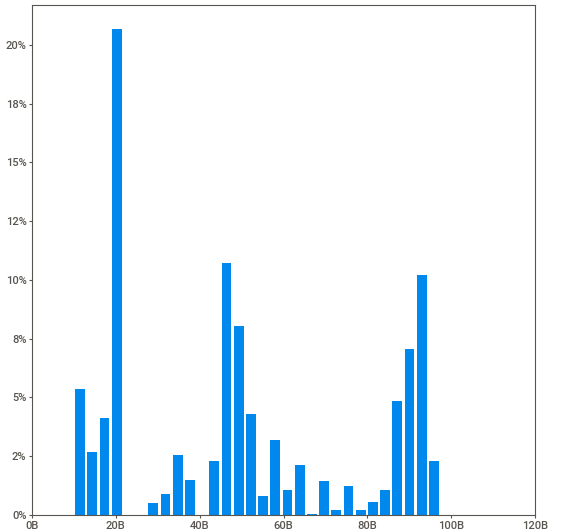
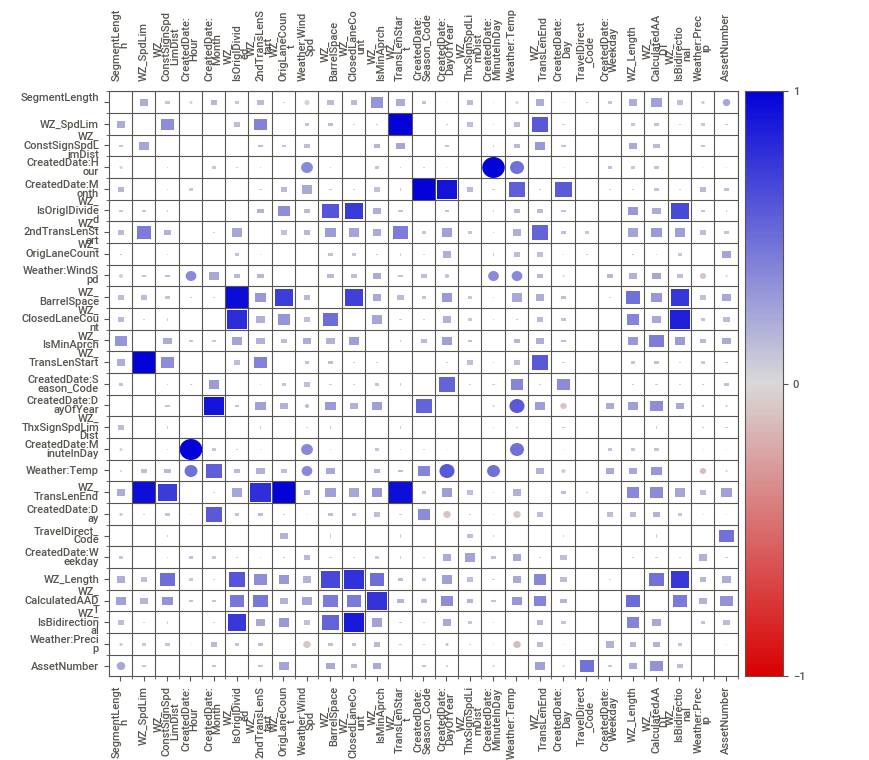
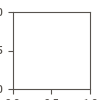

Report 'sweetviz_report.html' was saved to storage.


In [19]:
import sweetviz as sv

eda_report = sv.analyze(df_selected)
eda_report.show_notebook(filepath='sweetviz_report.html')

## Box plot

In [25]:
df_numeric = df_numeric.drop(
    columns=['WZ_OrigLaneCount', 'WZ_IsOrigIDivided', 'WZ_ClosedLaneCount', 'WZ_IsMinAprch', 'WZ_IsBidirectional',
             'TravelDirect_Code', 'CreatedDate:Season_Code'])

In [26]:
df_numeric = df_numeric.drop(columns=['BaselineTime', 'DelayTime'])

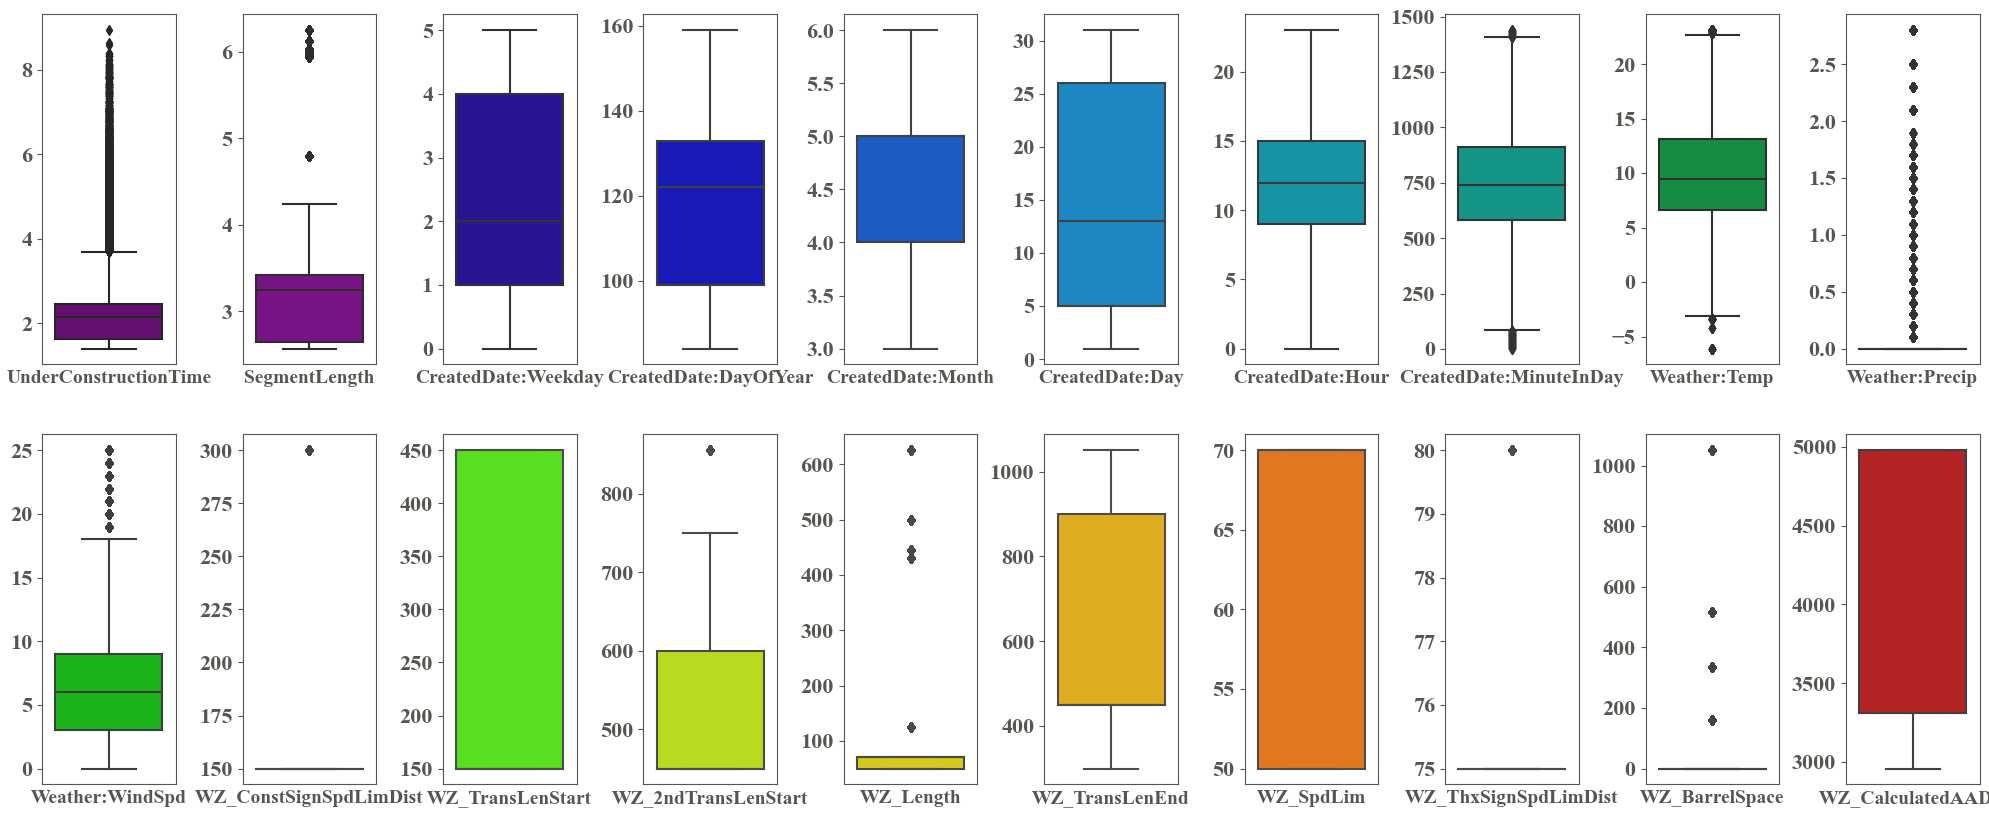

In [78]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'

num_rows = 2
fig, ax = plt.subplots(num_rows, len(df_numeric.columns) // num_rows, figsize=(25, 10))
plt.subplots_adjust(wspace=0.5)
colors = sns.color_palette('nipy_spectral', len(df_numeric.columns))

for i, column in enumerate(df_numeric.columns):
    row = i // (len(df_numeric.columns) // num_rows)
    col = i % (len(df_numeric.columns) // num_rows)
    sns.boxplot(data=df_numeric[column], ax=ax[row, col], color=colors[i])
    ax[row, col].set_xlabel(column)
    ax[row, col].set_xticks([])

plt.show()
fig.savefig(os.path.join(output_root_path, 'box_plots.svg'))
fig.savefig(os.path.join(output_root_path, 'box_plots.png'))